# PREDICTION OF OBESITY LEVEL OF ADULTS BASED ON THEIR DIET AND LIFESTYLE

In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [69]:
ObesityData = pd.read_csv("ObesityData.csv", encoding = "utf8")

In [70]:
ObesityData.head() 

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [71]:
ObesityData.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

In [72]:
ObesityData.describe() 

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


In [73]:
ObesityData=ObesityData.drop(columns=["Height","Weight"])
ObesityData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   family_history_with_overweight  2111 non-null   object 
 3   FAVC                            2111 non-null   object 
 4   FCVC                            2111 non-null   float64
 5   NCP                             2111 non-null   float64
 6   CAEC                            2111 non-null   object 
 7   SMOKE                           2111 non-null   object 
 8   CH2O                            2111 non-null   float64
 9   SCC                             2111 non-null   object 
 10  FAF                             2111 non-null   float64
 11  TUE                             2111 non-null   float64
 12  CALC                            21

In [74]:


# function to interigate data after conversion
# provides min, max, unique counts
def variable_counts(columns, stage):

    if stage == 'pre':
        print("Pre Conversion to Integer")
    else:
        print("Post Conversion to Integer")

    for col in columns:    
        print("Variable:", col, "| Count Unique:",ObesityData[col].nunique(),"| Min: ", ObesityData[col].min(), "| Max: ",ObesityData[col].max())

# Convert float variables to integer to the nearest inter
columns = ["FCVC", "NCP", "CH2O", "TUE", "FAF"]

# pre conversion countss
variable_counts(columns, 'pre')

# convert to int / nearest int value
for col in columns:
    #round to nearest whole number
    ObesityData[col] = round(ObesityData[col]).astype('int')  
    
# post conversion counts
variable_counts(columns, 'post') 

Pre Conversion to Integer
Variable: FCVC | Count Unique: 810 | Min:  1.0 | Max:  3.0
Variable: NCP | Count Unique: 635 | Min:  1.0 | Max:  4.0
Variable: CH2O | Count Unique: 1268 | Min:  1.0 | Max:  3.0
Variable: TUE | Count Unique: 1129 | Min:  0.0 | Max:  2.0
Variable: FAF | Count Unique: 1190 | Min:  0.0 | Max:  3.0
Post Conversion to Integer
Variable: FCVC | Count Unique: 3 | Min:  1 | Max:  3
Variable: NCP | Count Unique: 4 | Min:  1 | Max:  4
Variable: CH2O | Count Unique: 3 | Min:  1 | Max:  3
Variable: TUE | Count Unique: 3 | Min:  0 | Max:  2
Variable: FAF | Count Unique: 4 | Min:  0 | Max:  3


## Unvivariate Analysis

In [75]:
from sklearn.preprocessing import LabelEncoder
data = ObesityData.copy()
feature = data.drop('NObeyesdad',axis=1)
answer = data['NObeyesdad'].values.reshape(-1)
le = LabelEncoder()
for column_name in feature.columns:
  if feature[column_name].dtype == object:
    feature[column_name] = le.fit_transform(feature[column_name])
  else:
    pass

answer = le.fit_transform(answer)
feature

,Gender,Age,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
0,0,21.000000,1,0,2,3,2,0,2,0,0,1,3,3
1,0,21.000000,1,0,3,3,2,1,3,1,3,0,2,3
2,1,23.000000,1,0,2,3,2,0,2,0,2,1,1,3
3,1,27.000000,0,0,3,3,2,0,2,0,2,0,1,4
4,1,22.000000,0,0,2,1,2,0,2,0,0,0,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,0,20.976842,1,1,3,3,2,0,2,0,2,1,2,3
2107,0,21.982942,1,1,3,3,2,0,2,0,1,1,2,3
2108,0,22.524036,1,1,3,3,2,0,2,0,1,1,2,3
2109,0,24.361936,1,1,3,3,2,0,3,0,1,1,2,3


In [76]:
# Convert object/text variables to category variables
columns = ["Gender", "family_history_with_overweight", "FAVC", "CAEC", "SMOKE", "SCC", "CALC", "MTRANS", "NObeyesdad"]

for col in columns:
    ObesityData[col] = ObesityData[col].astype('category')

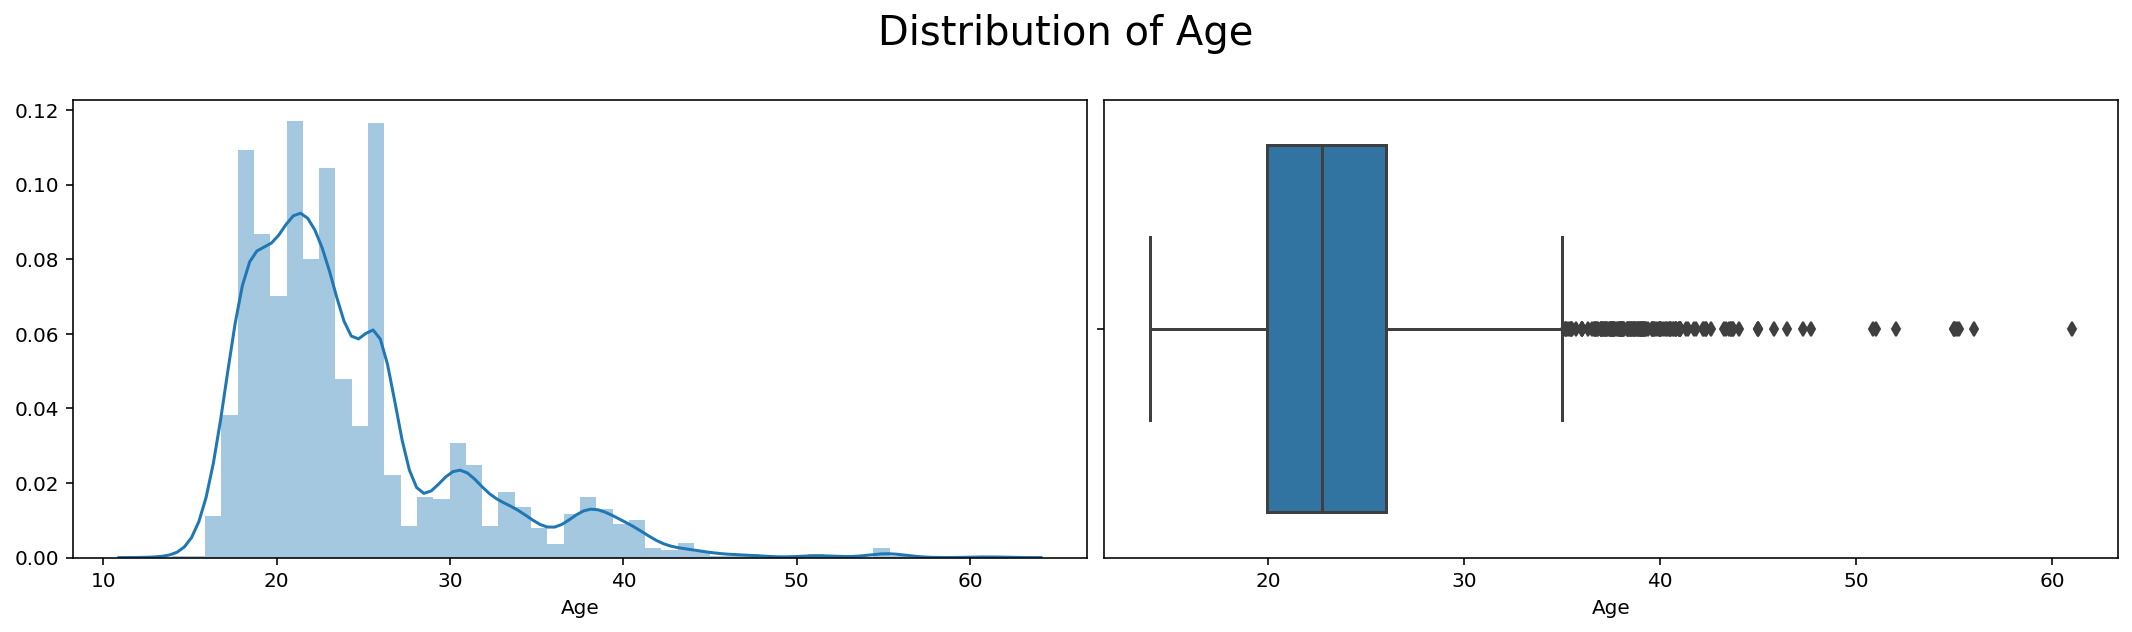

In [77]:
fig = plt.figure(figsize = (16,5))

#distplot
ax1 = fig.add_subplot(121)
sns.distplot(ObesityData["Age"], kde=True)

#boxplot
ax1 = ax1 = fig.add_subplot(122)
sns.boxplot(ObesityData.Age)

# show figure & plots
fig.suptitle("Distribution of Age", fontsize=20)
plt.tight_layout(pad=5, w_pad=0.5, h_pad=.1)
plt.show()


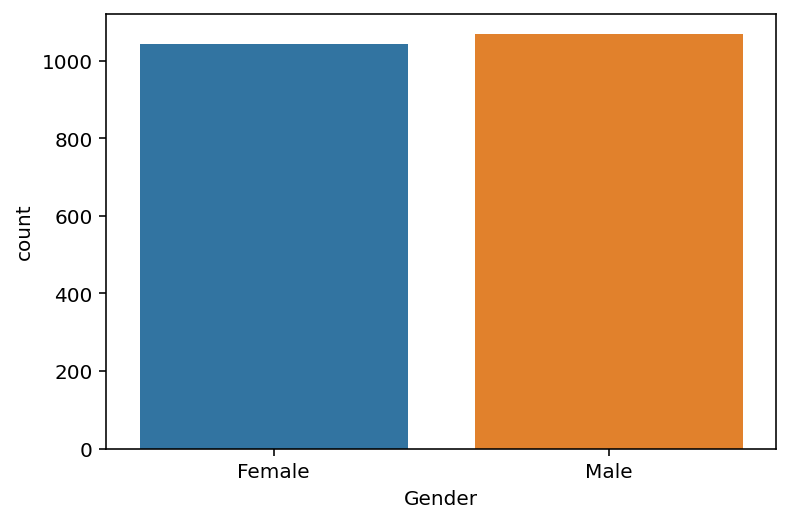

In [78]:
sns.countplot(ObesityData['Gender'])

Text(0.5, 1.0, 'Family History')

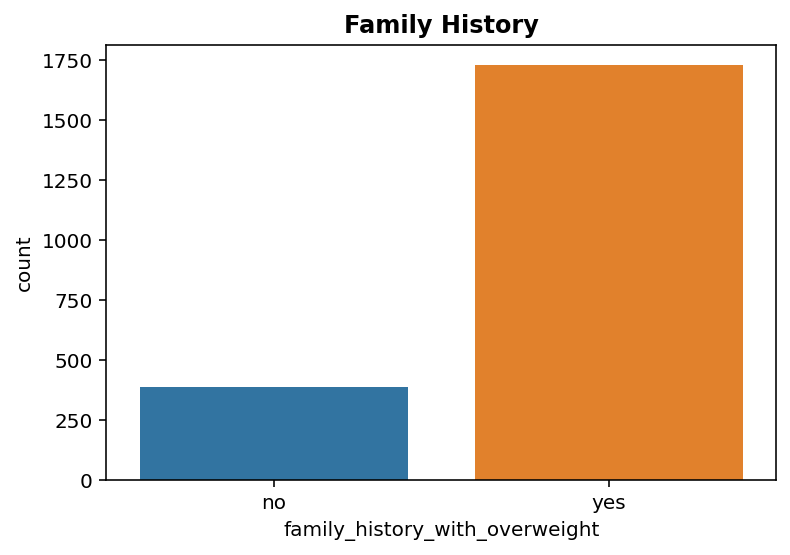

In [79]:
sns.countplot(ObesityData['family_history_with_overweight'])
plt.title('Family History', weight='bold')

Text(0.5, 1.0, 'Frequency of high caloric food')

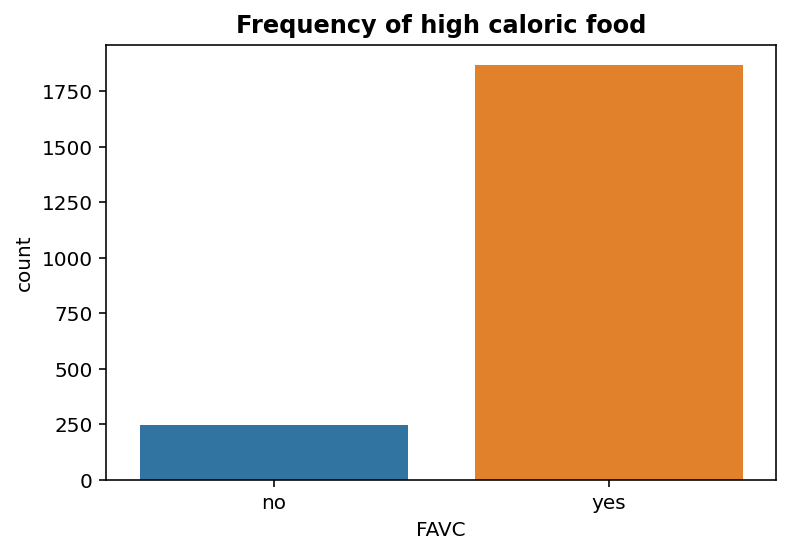

In [80]:
sns.countplot(ObesityData['FAVC'])
plt.title('Frequency of high caloric food', weight='bold')

Text(0.5, 1.0, 'Consumption of extra food between meals')

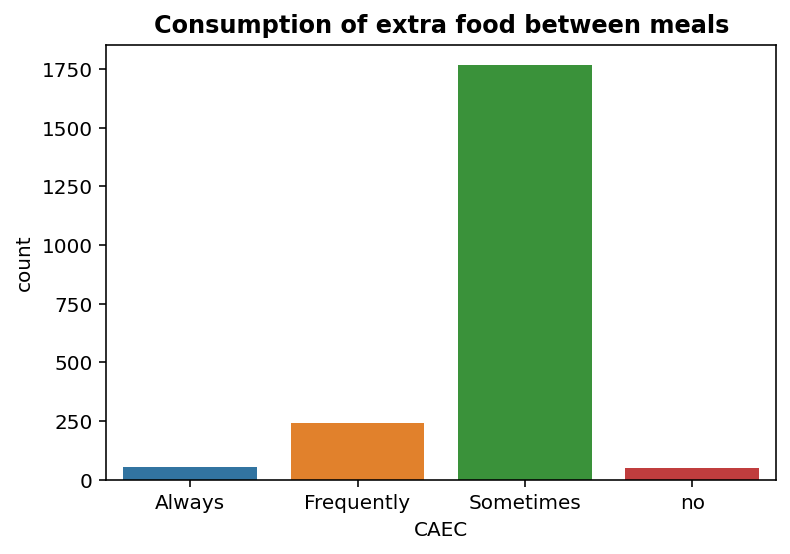

In [81]:
sns.countplot(ObesityData['CAEC'])
plt.title('Consumption of extra food between meals', weight='bold')

Text(0.5, 1.0, 'SMOKE')

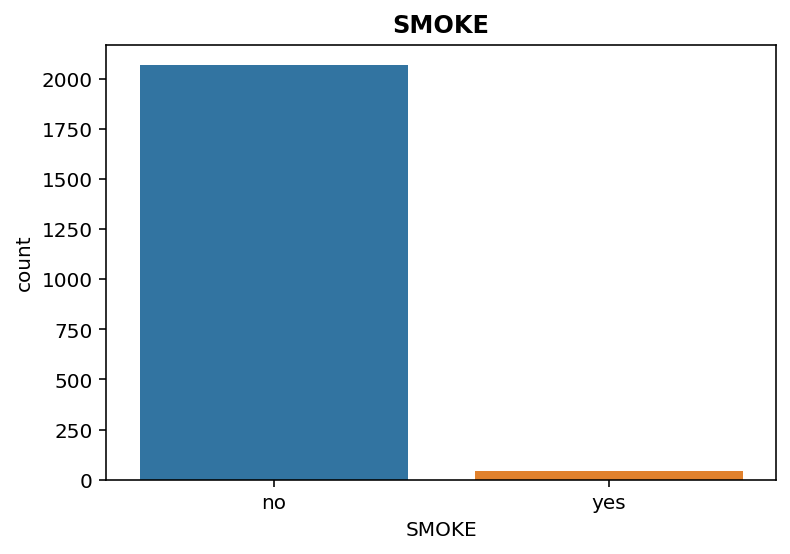

In [82]:
sns.countplot(ObesityData['SMOKE'])
plt.title('SMOKE', weight='bold')

Text(0.5, 1.0, '¿Do you monitor the calories you eat daily?')

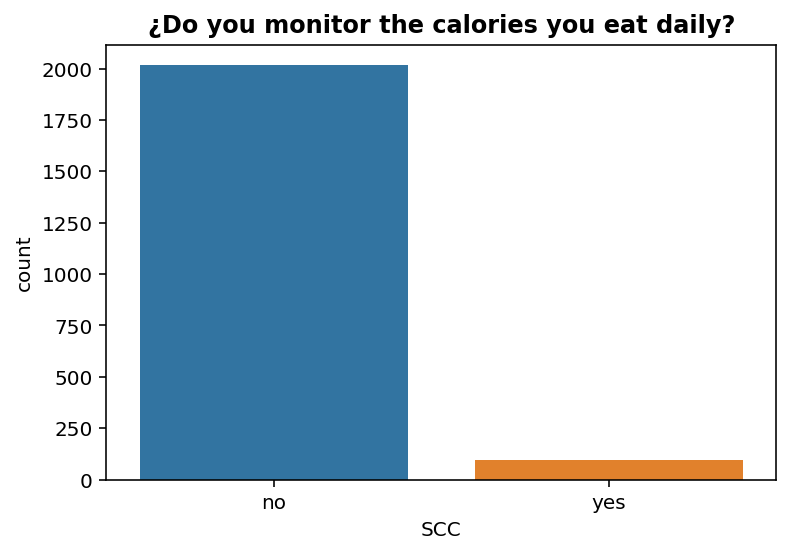

In [83]:
sns.countplot(ObesityData['SCC'])
plt.title('¿Do you monitor the calories you eat daily?', weight='bold')

(array([0, 1, 2, 3, 4]), <a list of 5 Text major ticklabel objects>)

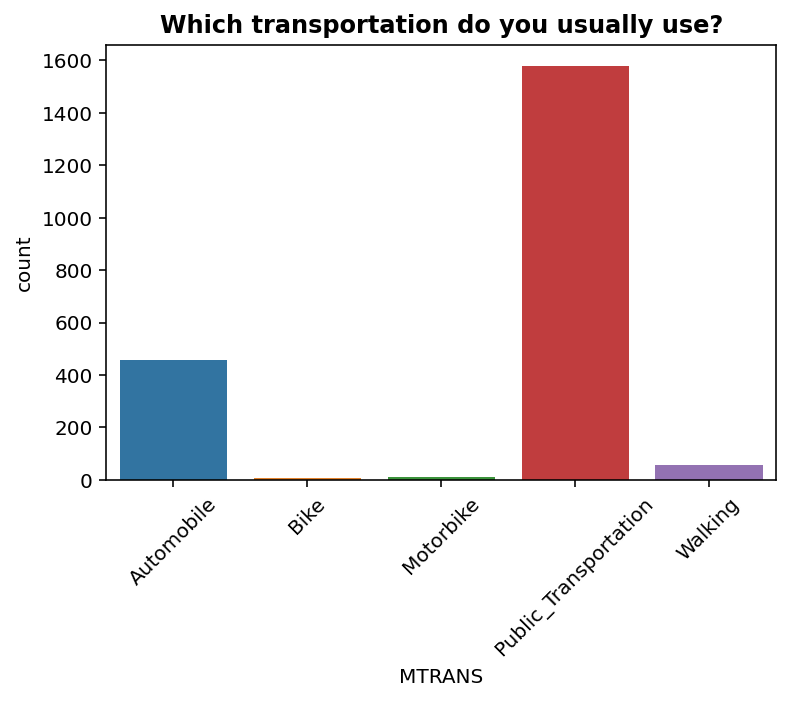

In [84]:
sns.countplot(ObesityData['MTRANS'])
plt.title('Which transportation do you usually use?', weight='bold')
plt.xticks(rotation=45)


(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text major ticklabel objects>)

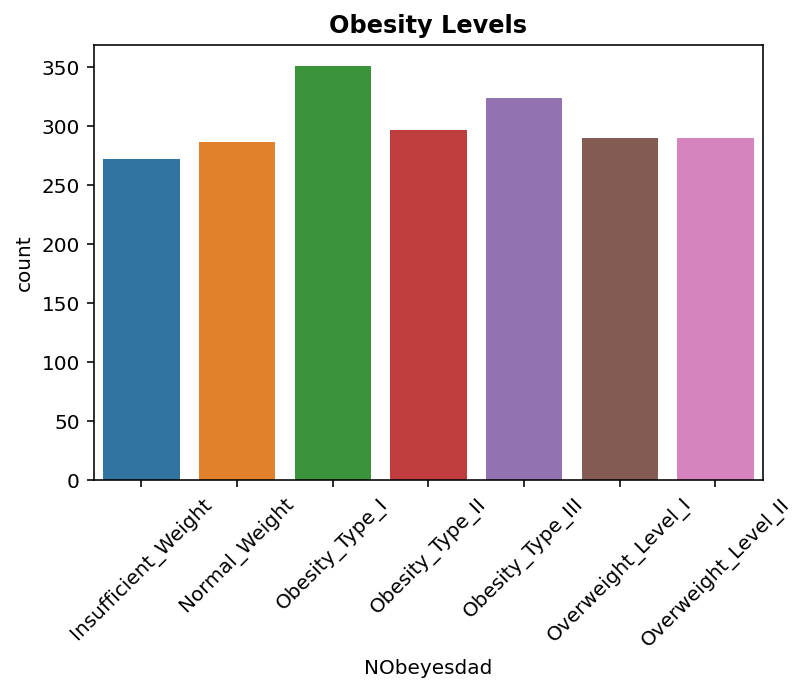

In [85]:
sns.countplot(ObesityData['NObeyesdad'])
plt.title('Obesity Levels', weight='bold')
plt.xticks(rotation=45)

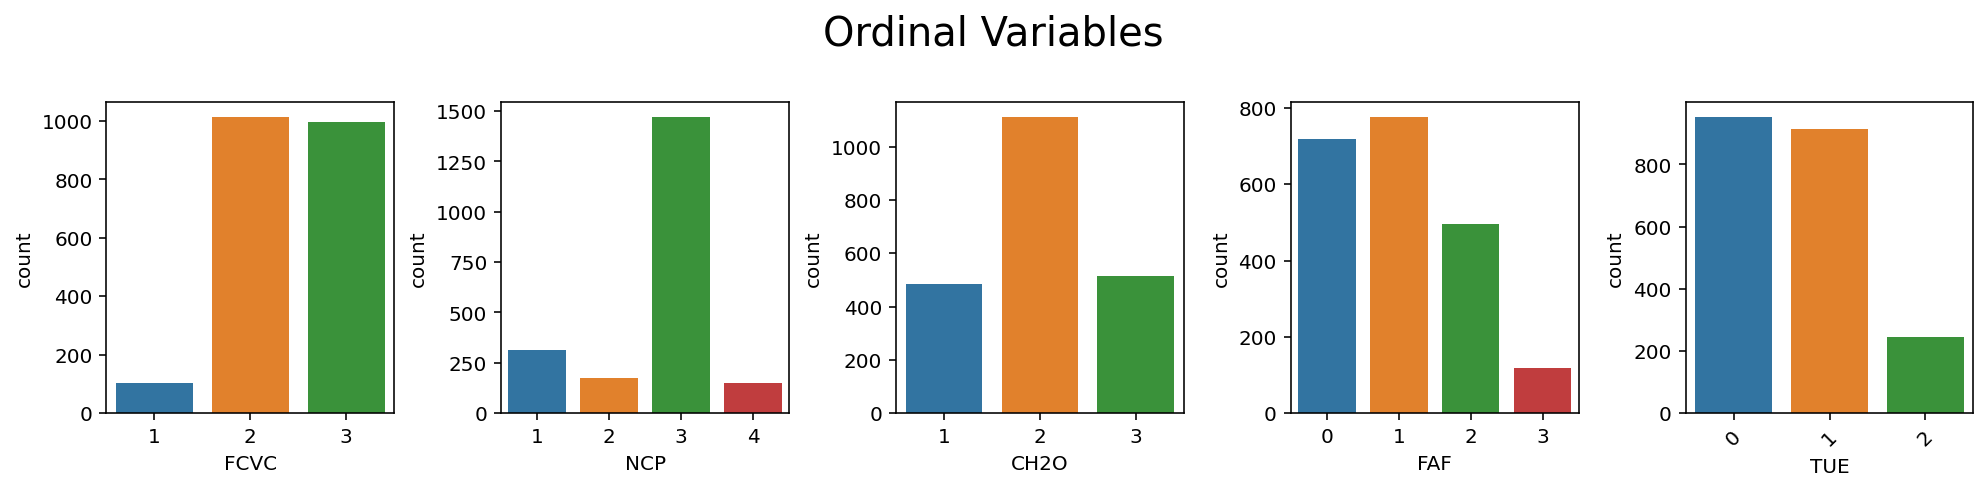

In [86]:
# columns of interest
columns = ["FCVC", "NCP", "CH2O", "FAF", "TUE"]

fig, ax = plt.subplots(1, 5, figsize=(15, 4))
for col, subplot in zip(columns, ax.flatten()):
    sns.countplot(ObesityData[col], ax=subplot)
    
    plt.xticks(rotation=45)
# show figure & plots
fig.suptitle("Ordinal Variables", fontsize=20)
plt.tight_layout(pad=5, w_pad=0.7, h_pad=0.5)
plt.show() 

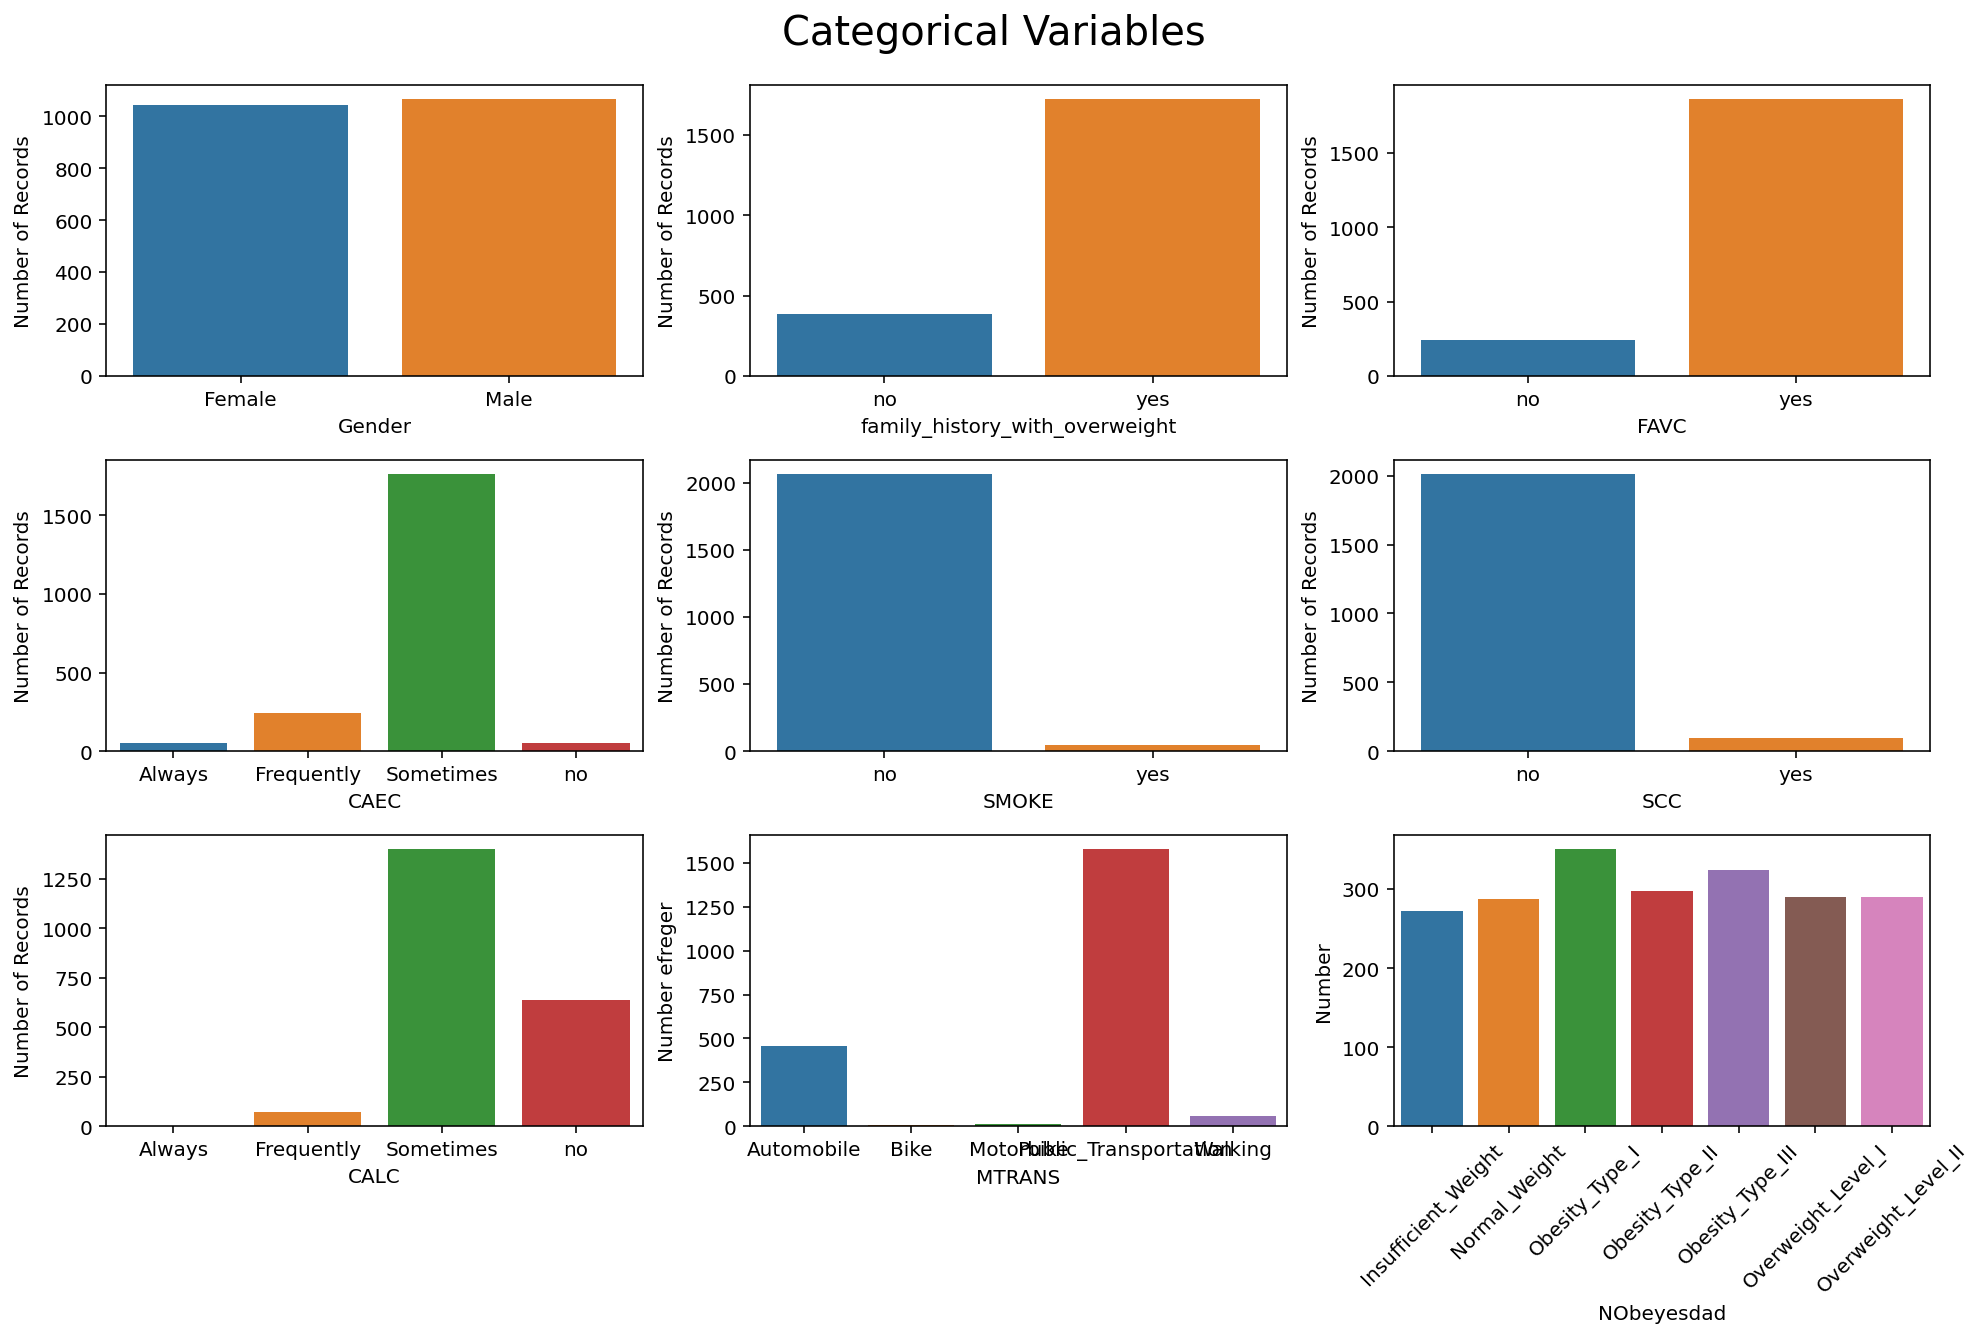

In [87]:
# columns of interest
columns = ['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE',
           'SCC', 'CALC', 'MTRANS', 'NObeyesdad']

fig, ax = plt.subplots(3, 3, figsize=(15, 10))
for col, subplot in zip(columns, ax.flatten()):
    sns.countplot(ObesityData[col], ax=subplot)
    subplot.yaxis.label.set_text("Count")
    if col=="NObeyesdad":
        plt.xticks(rotation=45)
        subplot.yaxis.label.set_text("Number")
    elif col=="MTRANS":
        plt.xticks(rotation=30)
        subplot.yaxis.label.set_text("Number efreger")
    else:
        subplot.yaxis.label.set_text("Number of Records")
        
# show figure & plots
fig.suptitle("Categorical Variables", fontsize=20)
plt.tight_layout(pad=5, w_pad=0.7, h_pad=1)
plt.show()

## Bivariate Analysis

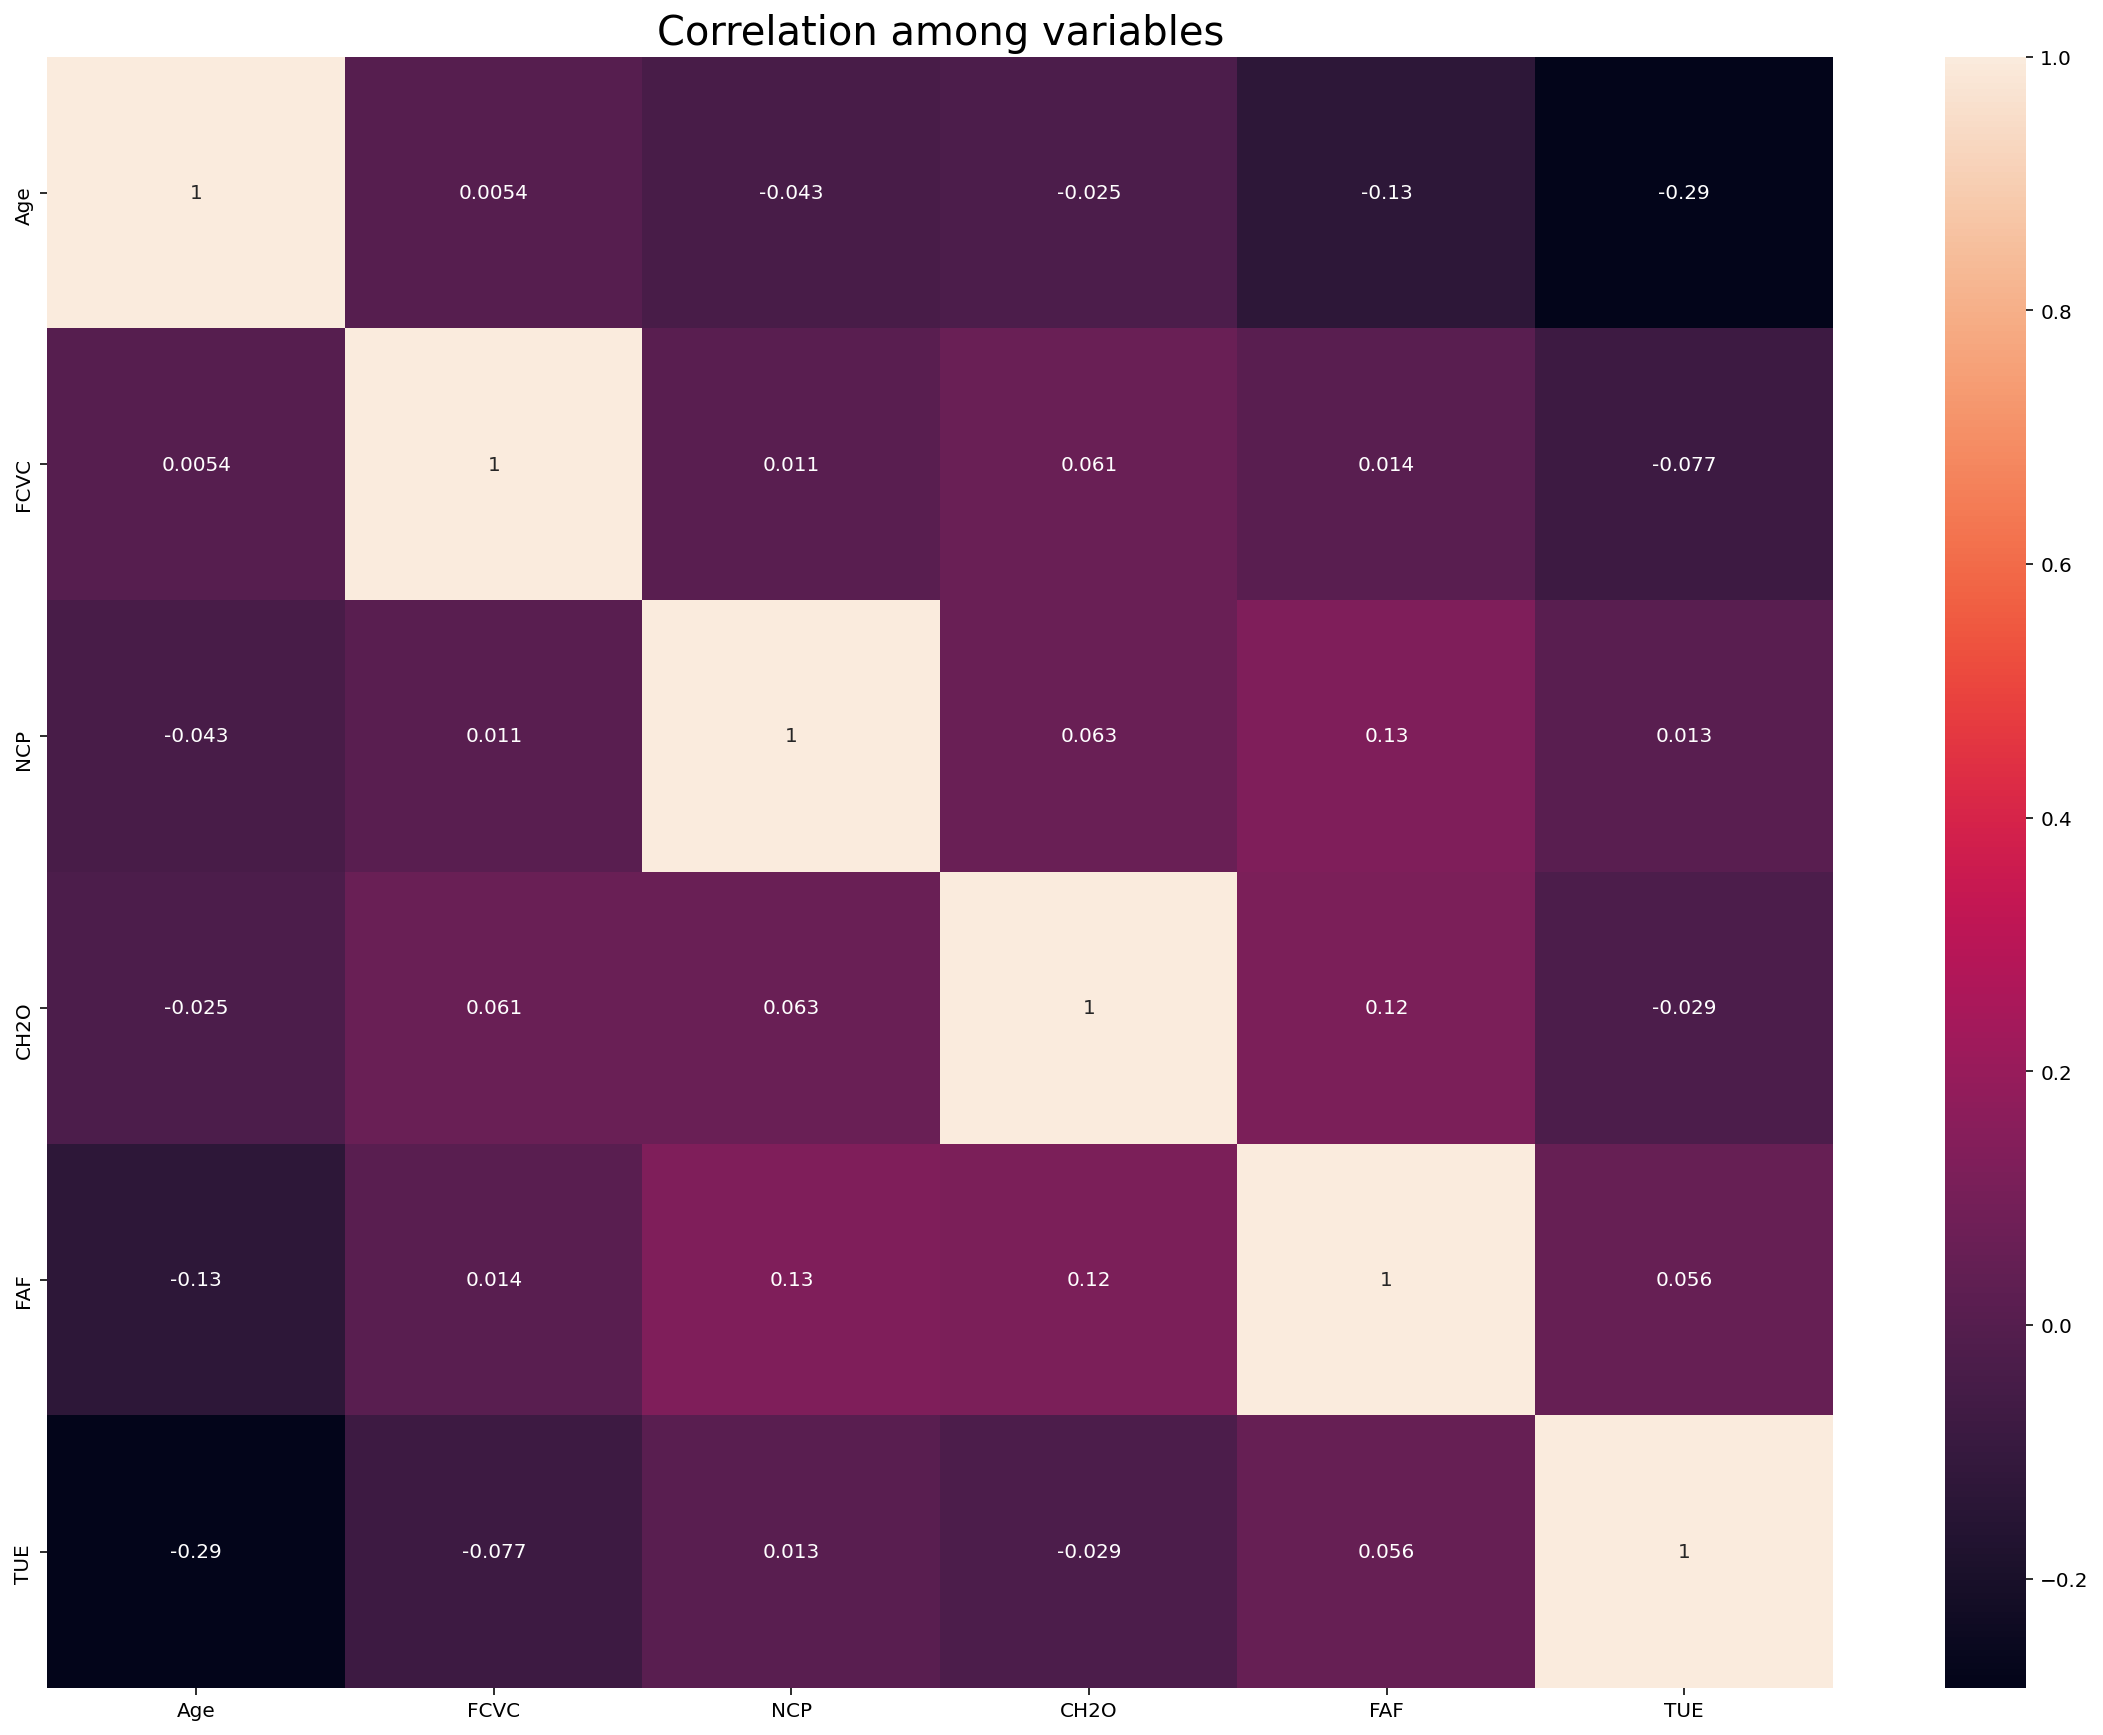

In [88]:

fig, ax = plt.subplots(figsize=(20,15))
corr = ObesityData.corr()
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values, annot=True, ax=ax)
plt.title('Correlation among variables',fontsize=20)
plt.show()

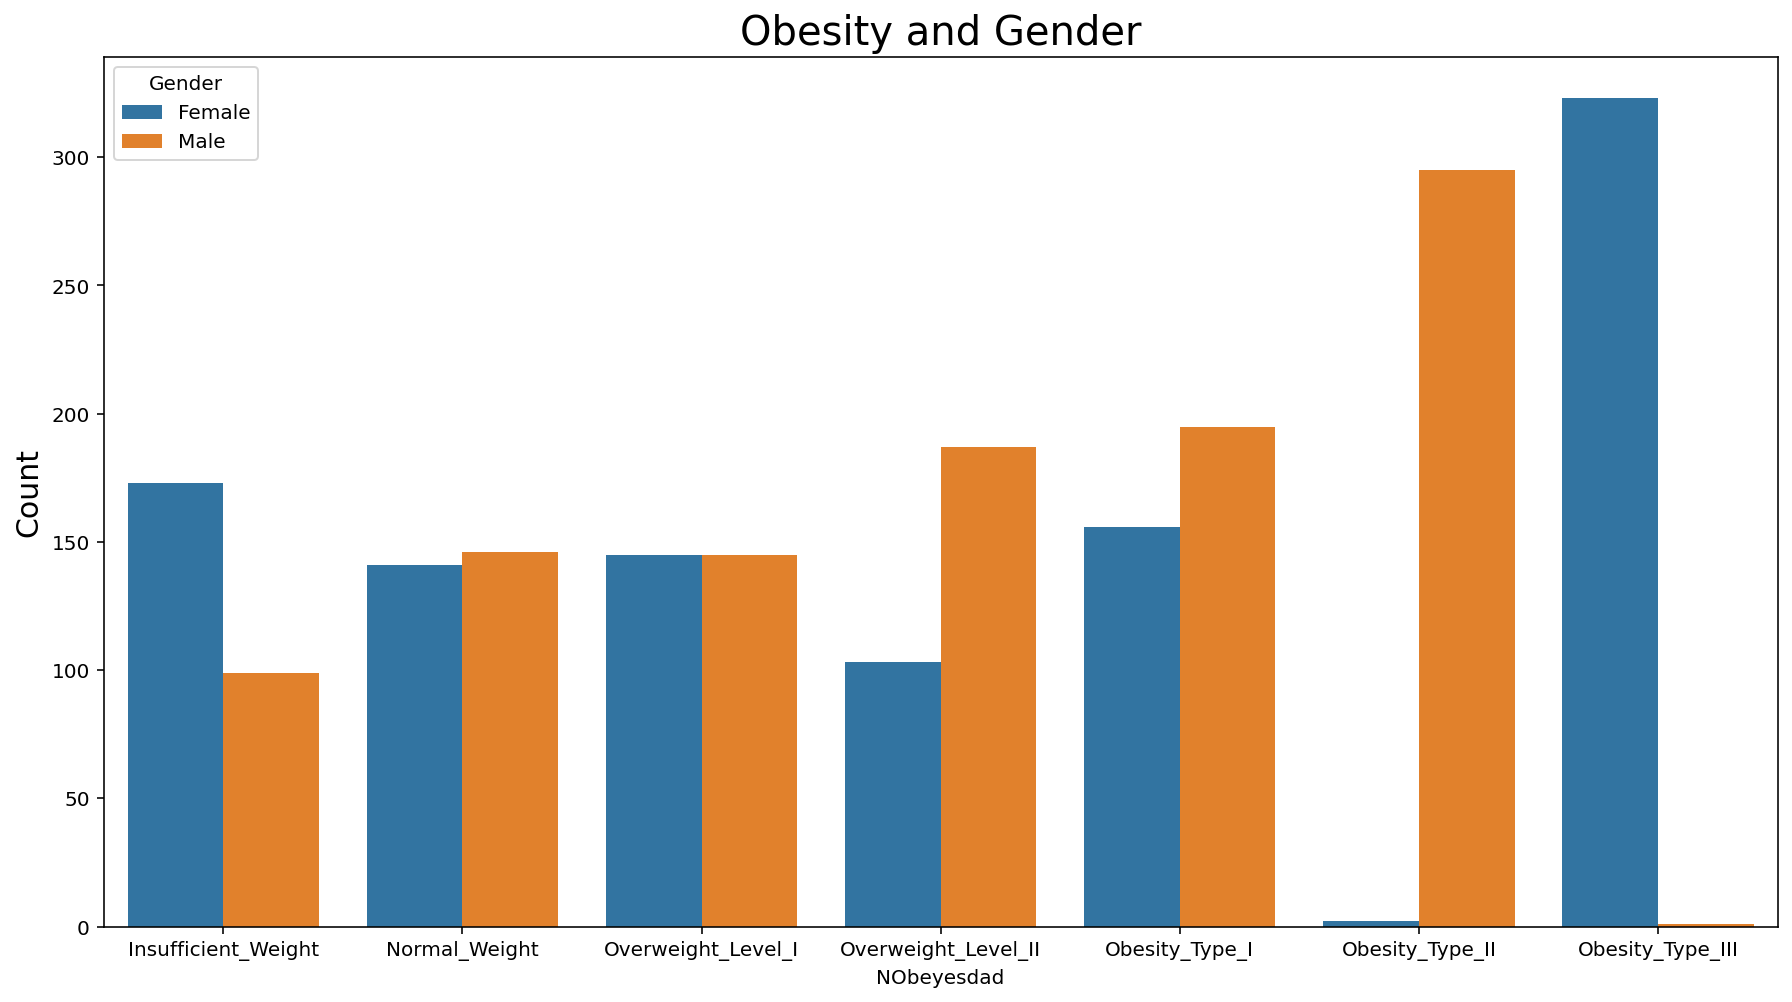

In [89]:
plt.figure(figsize=(15,8))
sns.countplot(x='NObeyesdad',data=ObesityData,hue='Gender',order=['Insufficient_Weight','Normal_Weight','Overweight_Level_I',
'Overweight_Level_II','Obesity_Type_I','Obesity_Type_II','Obesity_Type_III'])
plt.title('Obesity and Gender',fontsize=20)
plt.ylabel('Count',fontsize=15)
plt.show()


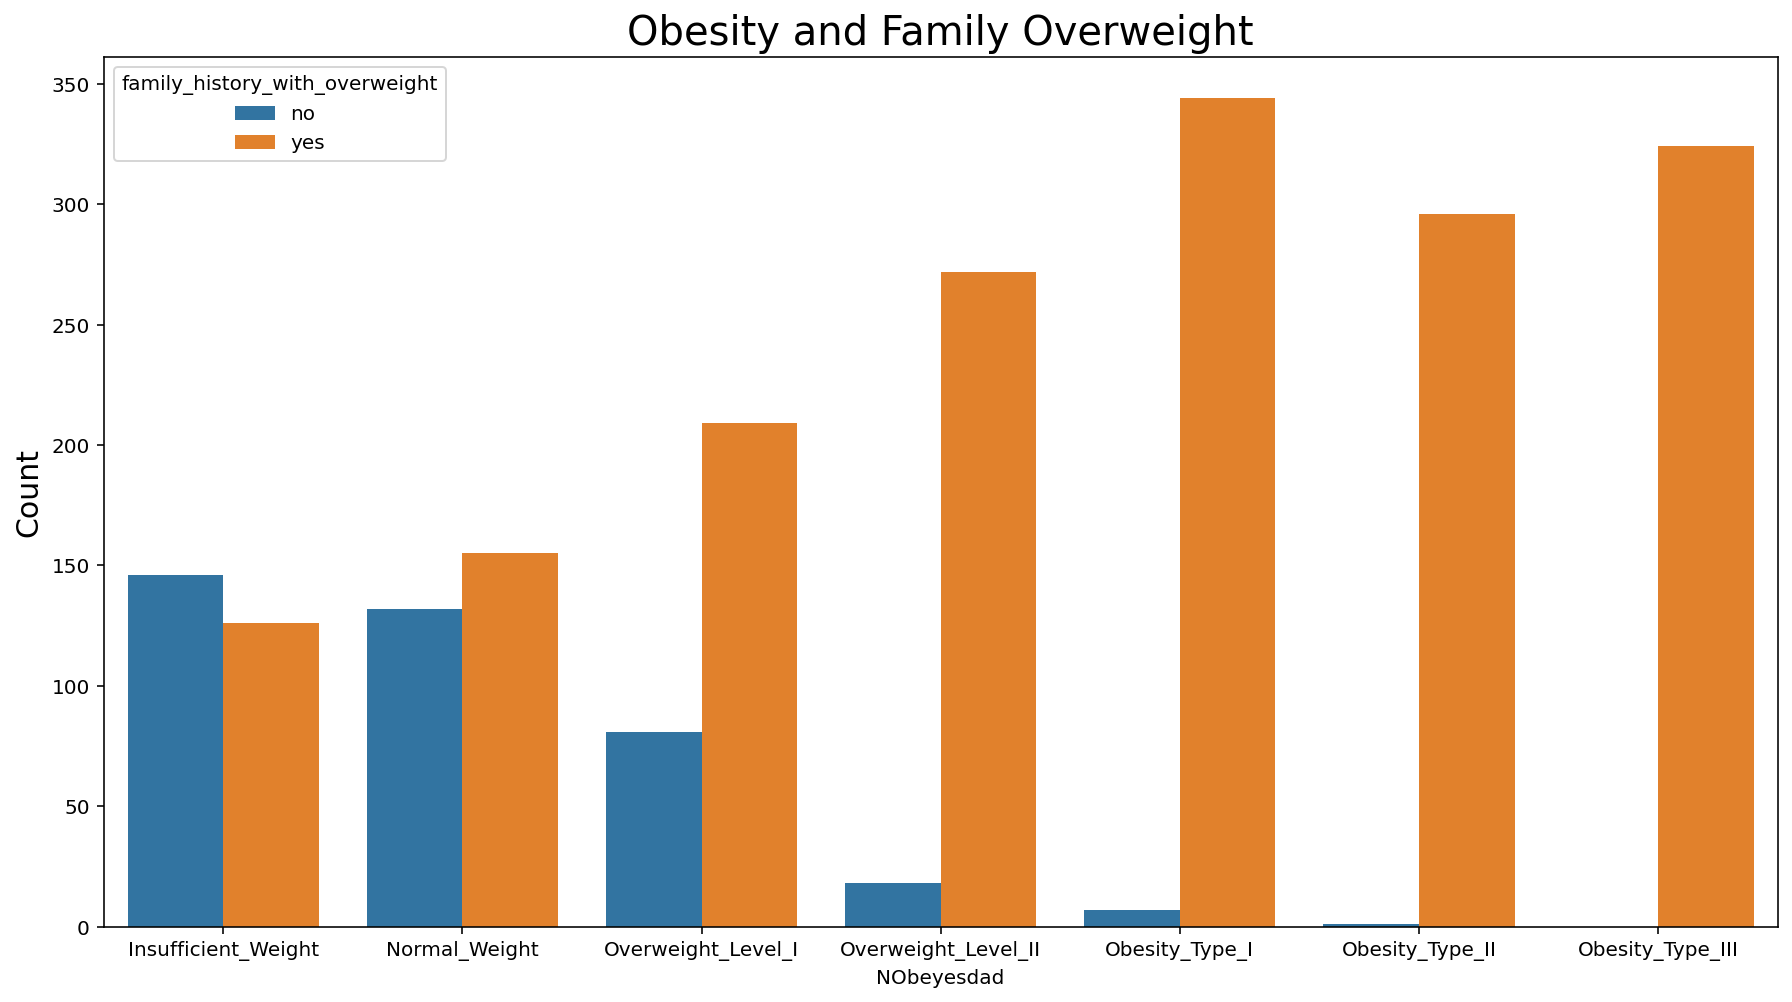

In [90]:
plt.figure(figsize=(15,8))
sns.countplot(x='NObeyesdad',data=ObesityData,hue='family_history_with_overweight',order=['Insufficient_Weight','Normal_Weight','Overweight_Level_I',
'Overweight_Level_II','Obesity_Type_I','Obesity_Type_II','Obesity_Type_III'])
plt.title('Obesity and Family Overweight',fontsize=20)
plt.ylabel('Count',fontsize=15)

plt.show()

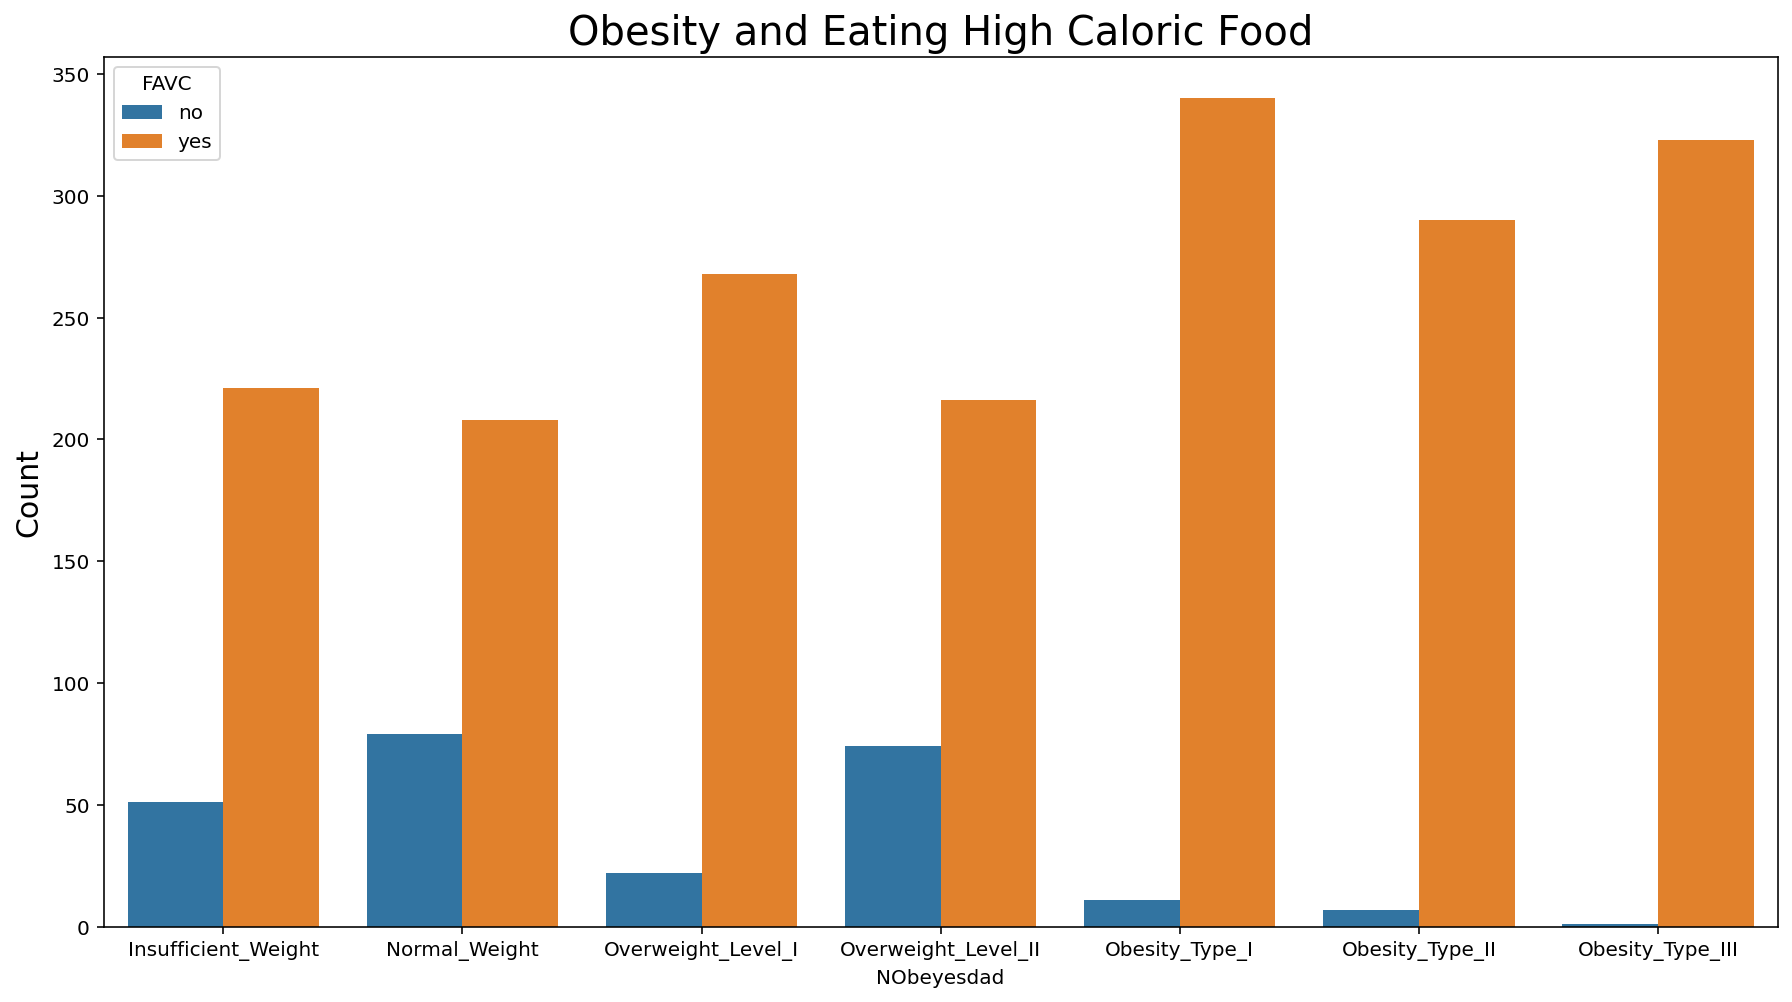

In [91]:
plt.figure(figsize=(15,8))
sns.countplot(x='NObeyesdad',data=ObesityData,hue='FAVC',order=['Insufficient_Weight','Normal_Weight','Overweight_Level_I',
'Overweight_Level_II','Obesity_Type_I','Obesity_Type_II','Obesity_Type_III'])
plt.title('Obesity and Eating High Caloric Food',fontsize=20)
plt.ylabel('Count',fontsize=15)

plt.show()

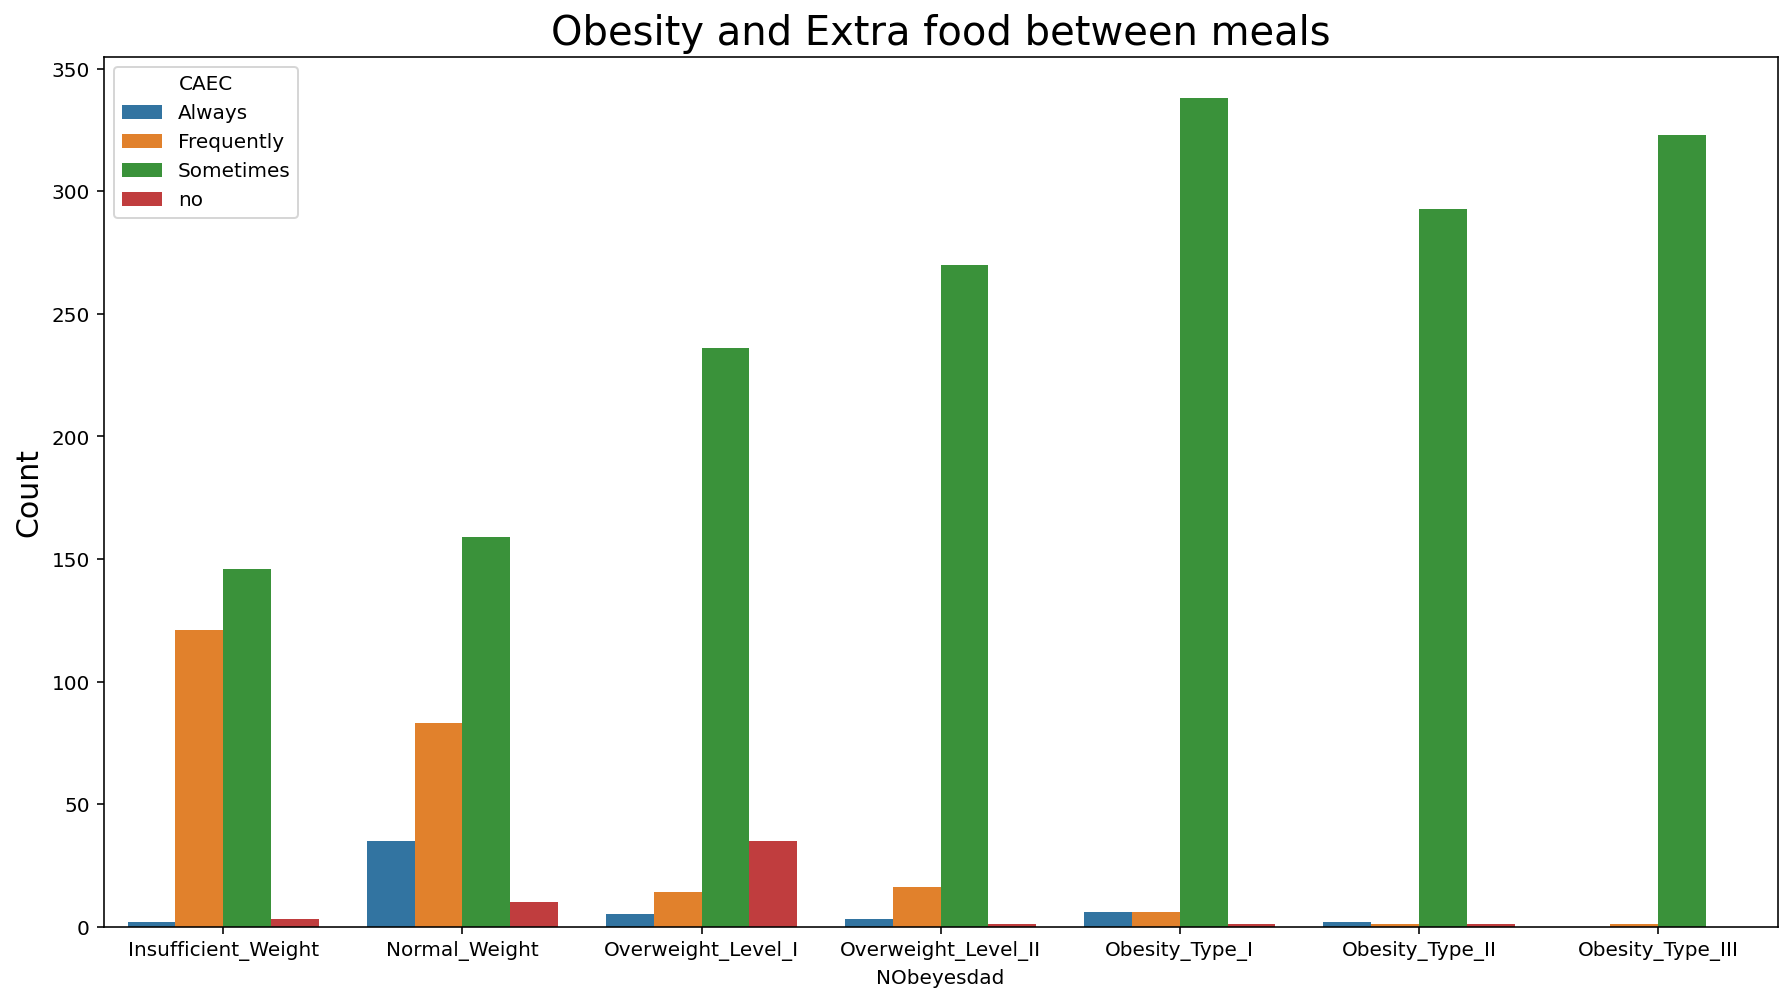

In [92]:
plt.figure(figsize=(15,8))
sns.countplot(x='NObeyesdad',data=ObesityData,hue='CAEC',order=['Insufficient_Weight','Normal_Weight','Overweight_Level_I',
'Overweight_Level_II','Obesity_Type_I','Obesity_Type_II','Obesity_Type_III'])
plt.title('Obesity and Extra food between meals',fontsize=20)
plt.ylabel('Count',fontsize=15)

plt.show()

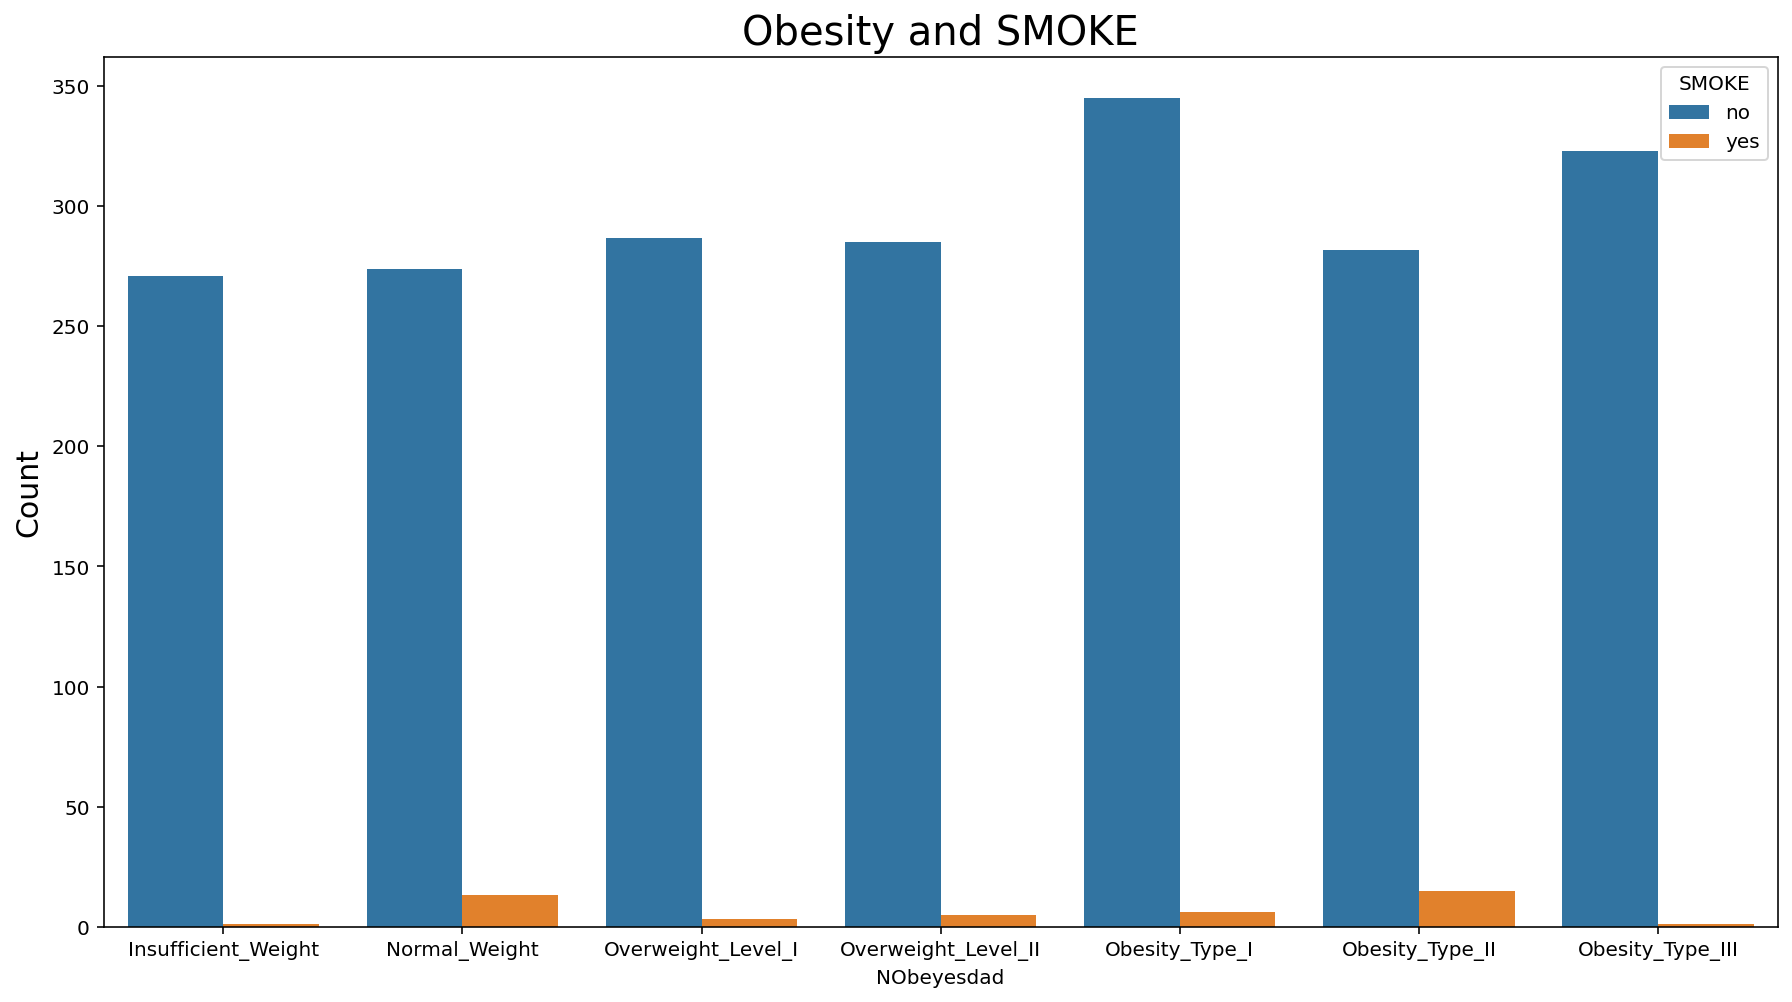

In [93]:
plt.figure(figsize=(15,8))
sns.countplot(x='NObeyesdad',data=ObesityData,hue='SMOKE',order=['Insufficient_Weight','Normal_Weight','Overweight_Level_I',
'Overweight_Level_II','Obesity_Type_I','Obesity_Type_II','Obesity_Type_III'])
plt.title('Obesity and SMOKE',fontsize=20)
plt.ylabel('Count',fontsize=15)

plt.show()

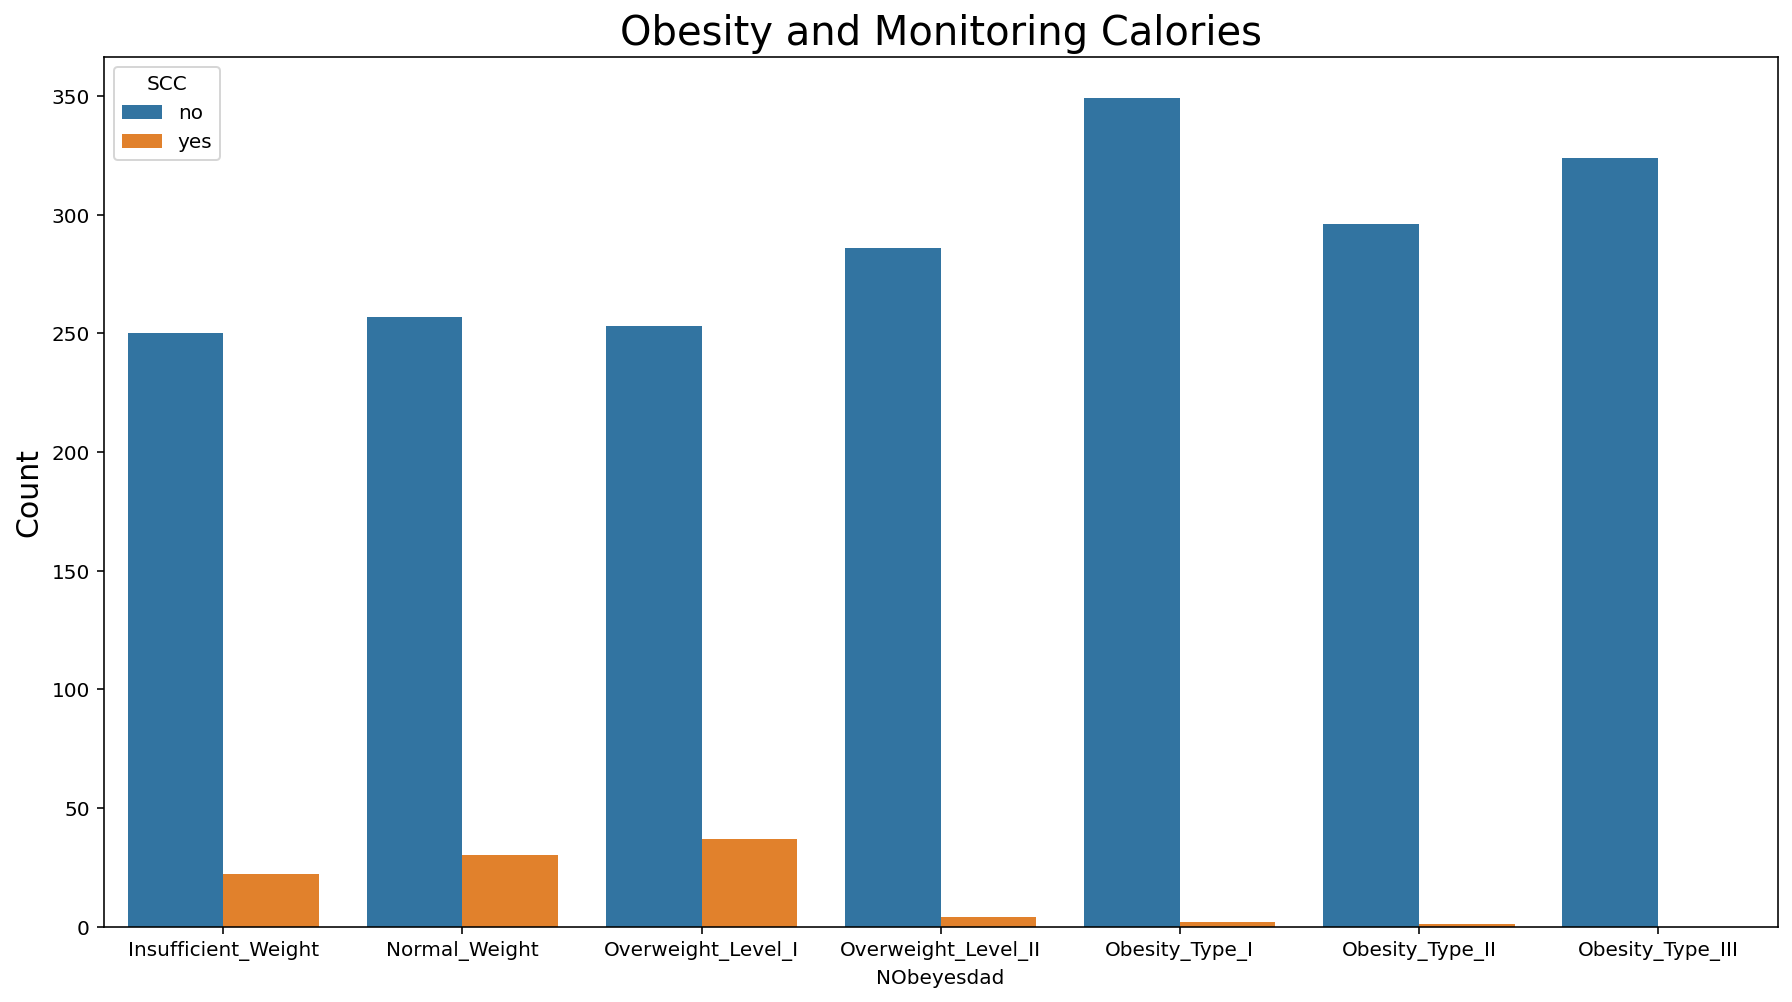

In [94]:
plt.figure(figsize=(15,8))
sns.countplot(x='NObeyesdad',data=ObesityData,hue='SCC',order=['Insufficient_Weight','Normal_Weight','Overweight_Level_I',
'Overweight_Level_II','Obesity_Type_I','Obesity_Type_II','Obesity_Type_III'])
plt.title('Obesity and Monitoring Calories',fontsize=20)
plt.ylabel('Count',fontsize=15)

plt.show()

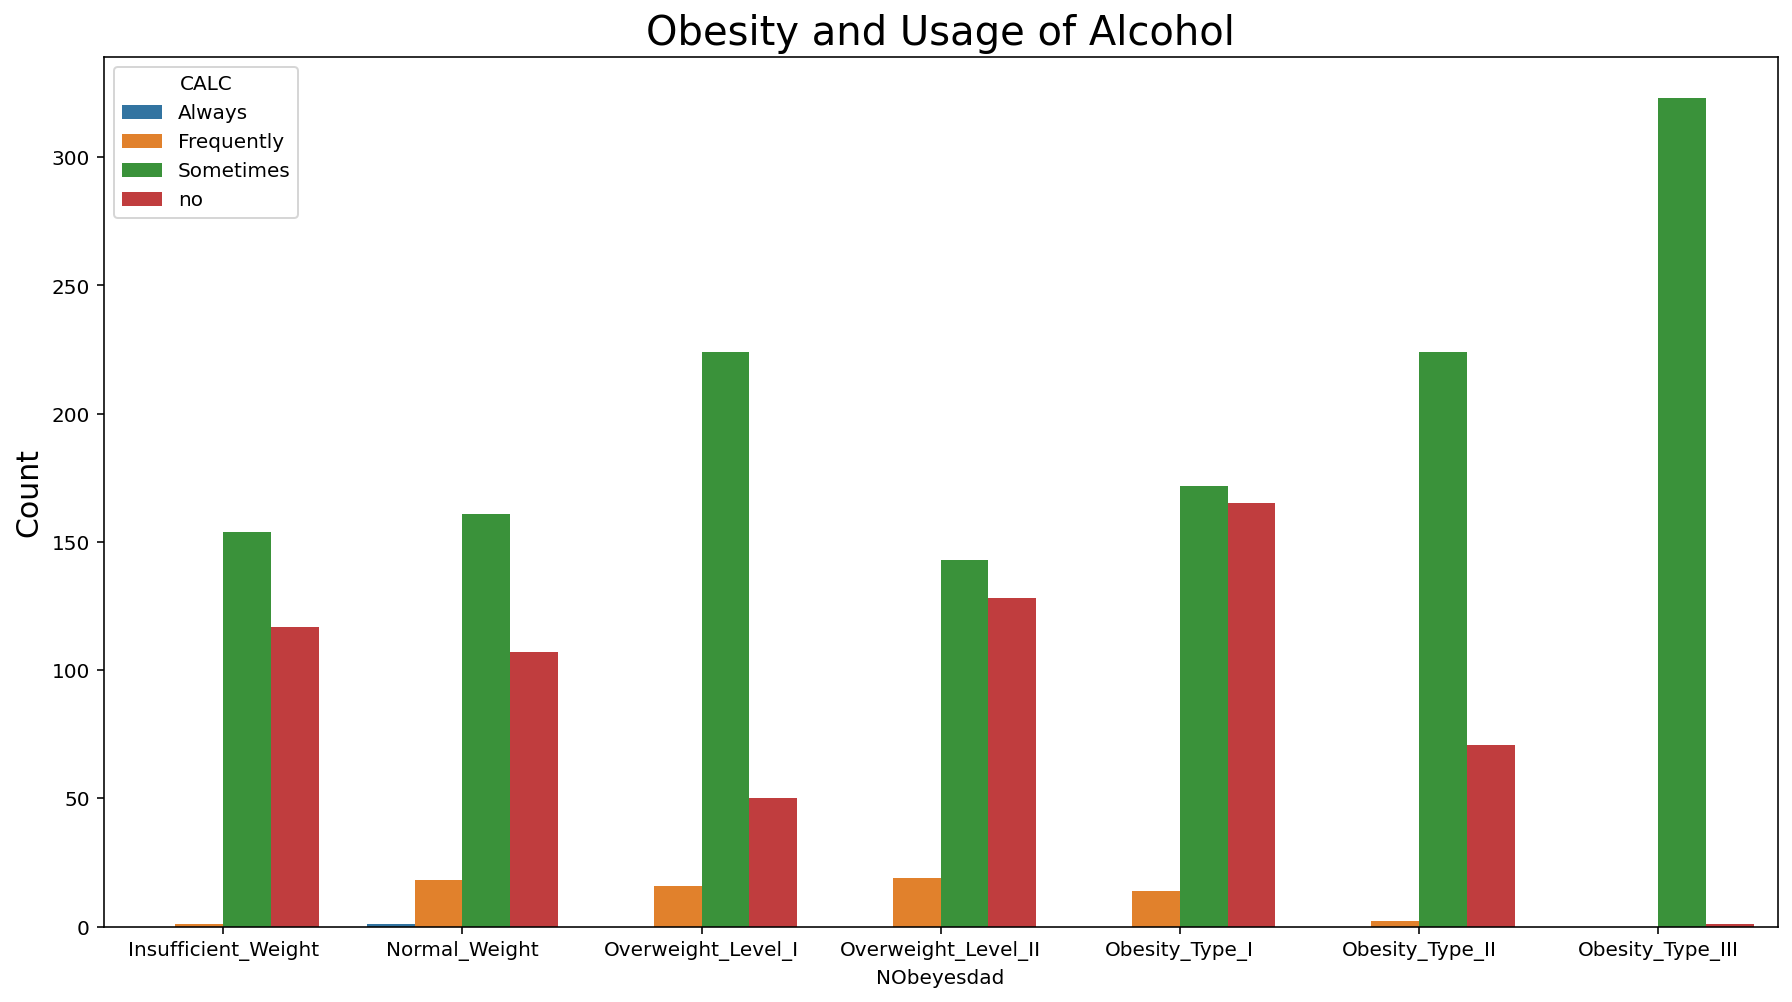

In [95]:
plt.figure(figsize=(15,8))
sns.countplot(x='NObeyesdad',data=ObesityData,hue='CALC',order=['Insufficient_Weight','Normal_Weight','Overweight_Level_I',
'Overweight_Level_II','Obesity_Type_I','Obesity_Type_II','Obesity_Type_III'])
plt.title('Obesity and Usage of Alcohol',fontsize=20)
plt.ylabel('Count',fontsize=15)

plt.show()

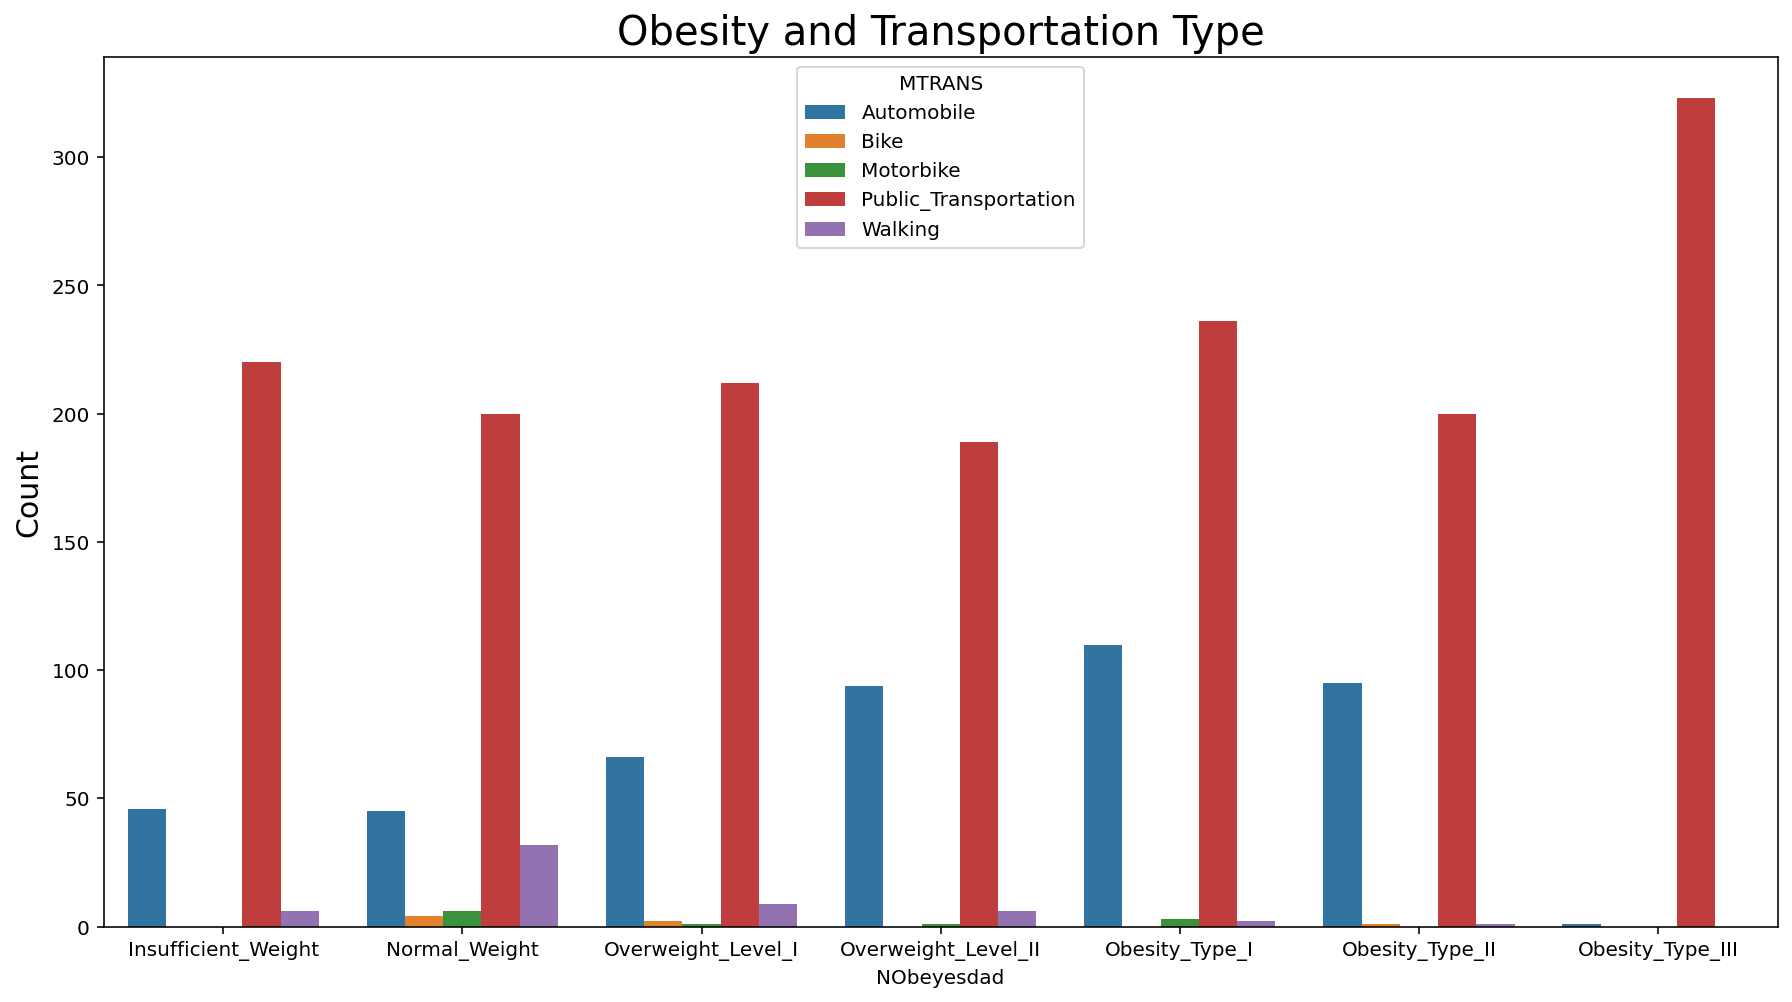

In [96]:
plt.figure(figsize=(15,8))
sns.countplot(x='NObeyesdad',data=ObesityData,hue='MTRANS',order=['Insufficient_Weight','Normal_Weight','Overweight_Level_I',
'Overweight_Level_II','Obesity_Type_I','Obesity_Type_II','Obesity_Type_III'])
plt.title('Obesity and Transportation Type',fontsize=20)
plt.ylabel('Count',fontsize=15)

plt.show()

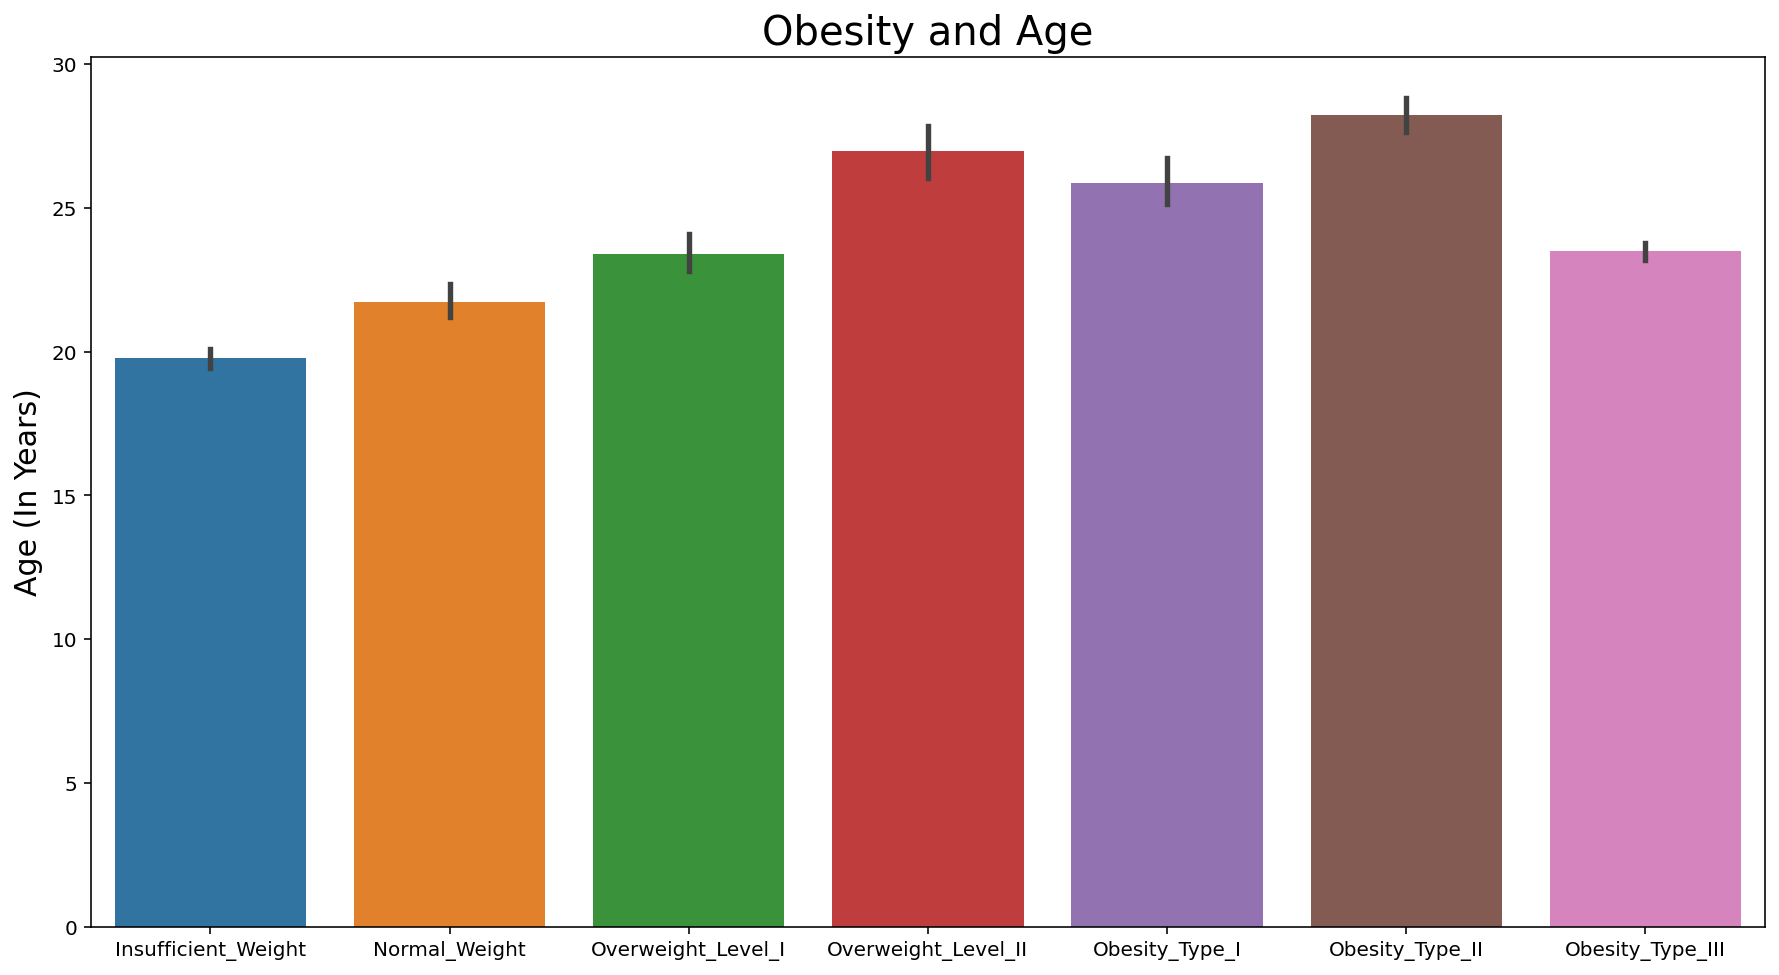

In [97]:
# plt.figure(figsize=(15,8))
# sns.barplot(x='NObeyesdad',data=ObesityData,y='Age')
# plt.title('Obesity and Age')
# plt.ylabel('Age')
# plt.show()
plt.figure(figsize=(15,8))
sns.barplot(x='NObeyesdad',y='Age',data=ObesityData,order=['Insufficient_Weight','Normal_Weight','Overweight_Level_I',
'Overweight_Level_II','Obesity_Type_I','Obesity_Type_II','Obesity_Type_III'])
plt.title('Obesity and Age',fontsize=20)
plt.ylabel('Age (In Years)',fontsize=15)
plt.xlabel(None)
plt.show()

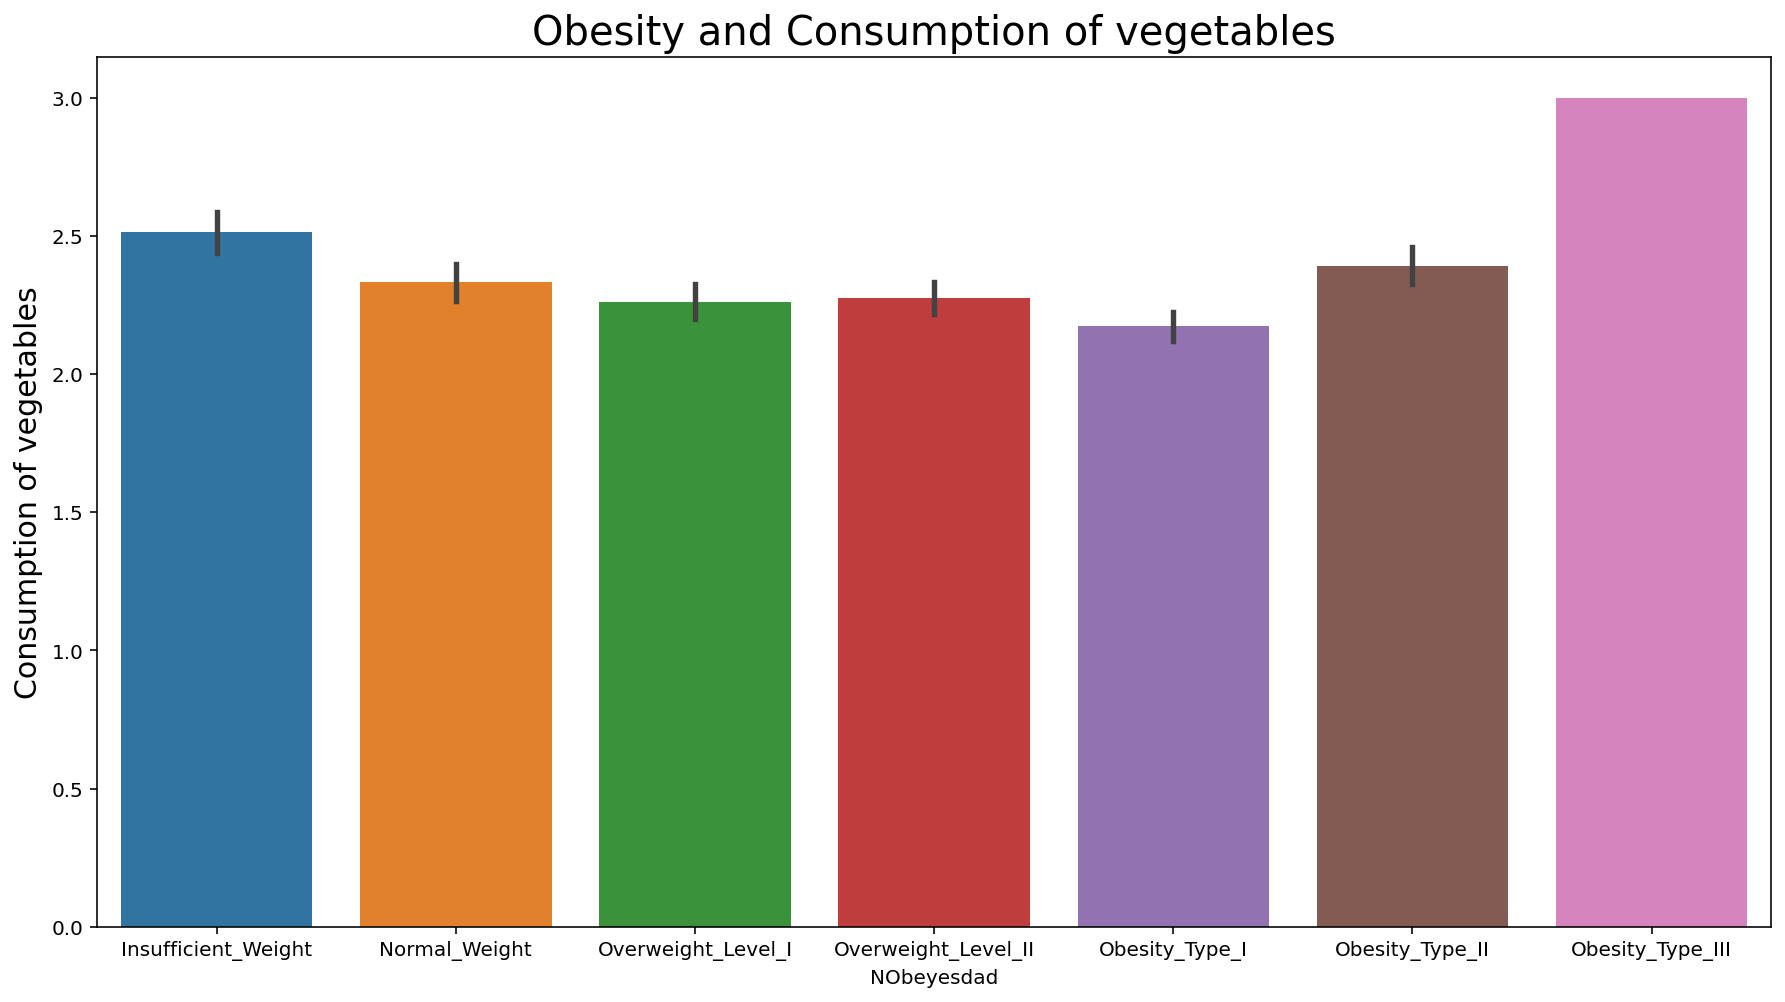

In [98]:
plt.figure(figsize=(15,8))
sns.barplot(x='NObeyesdad',data=ObesityData,y='FCVC',order=['Insufficient_Weight','Normal_Weight','Overweight_Level_I',
'Overweight_Level_II','Obesity_Type_I','Obesity_Type_II','Obesity_Type_III'])
plt.title('Obesity and Consumption of vegetables',fontsize=20)
plt.ylabel('Consumption of vegetables',fontsize=15)
plt.show()


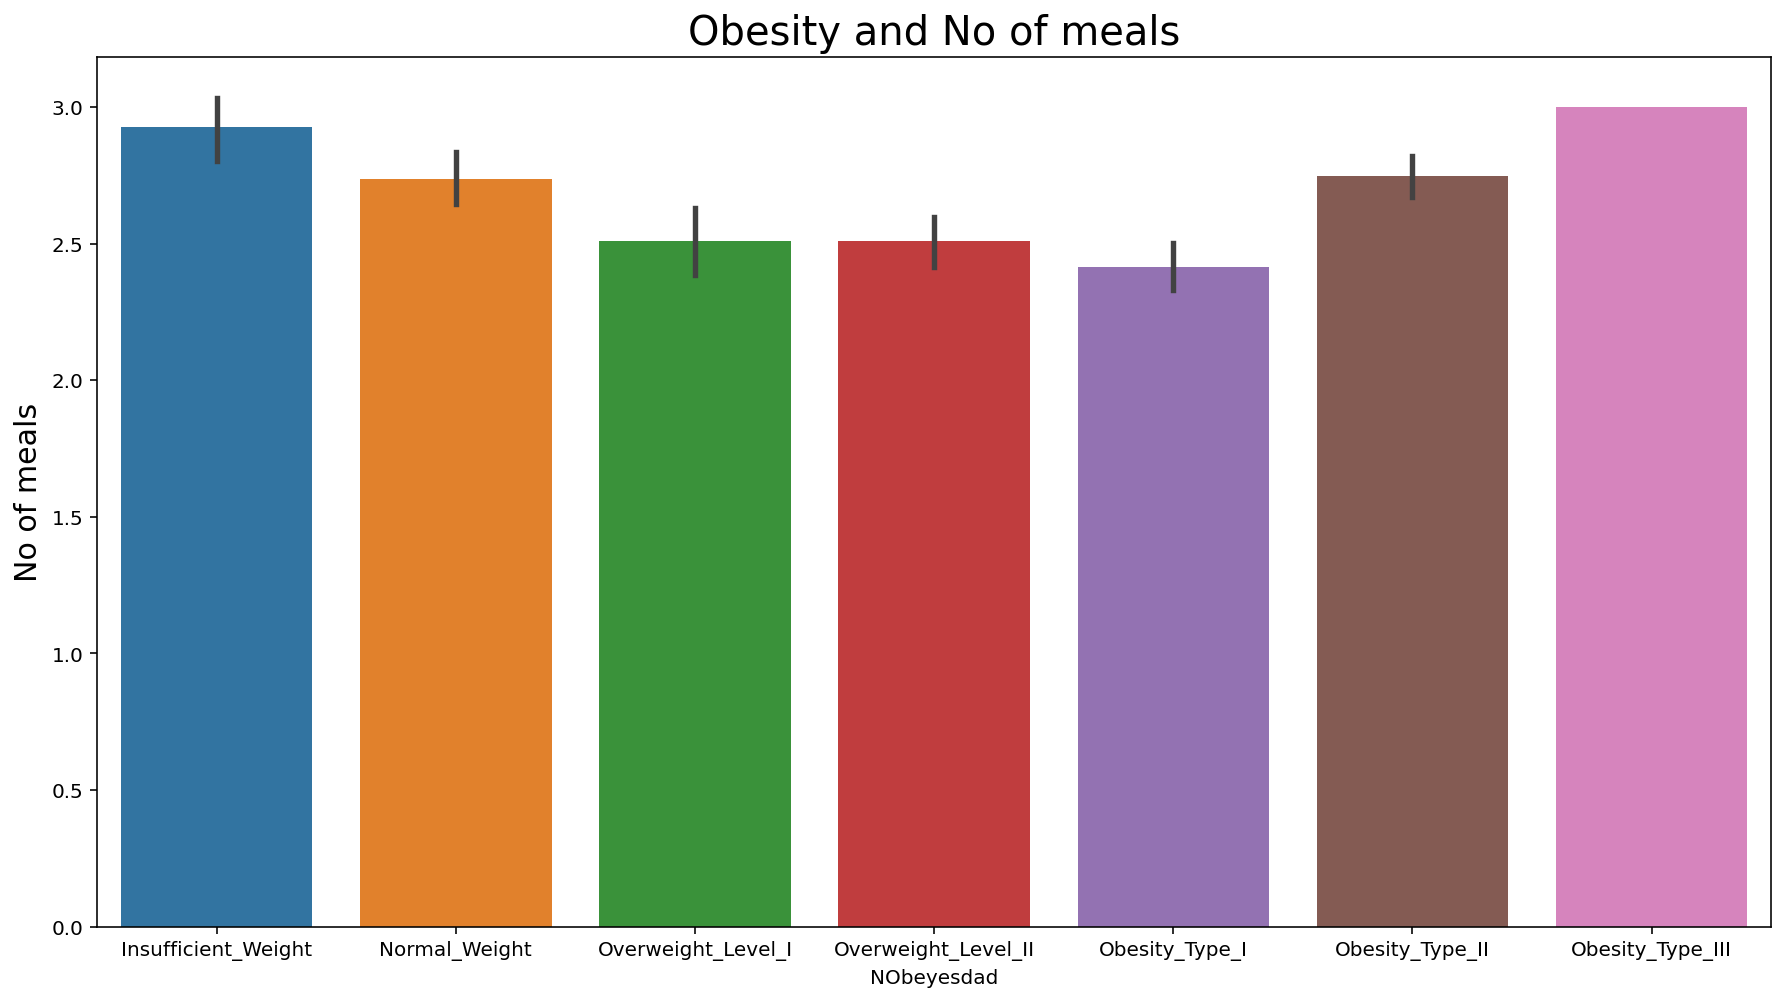

In [99]:
plt.figure(figsize=(15,8))
sns.barplot(x='NObeyesdad',data=ObesityData,y='NCP',order=['Insufficient_Weight','Normal_Weight','Overweight_Level_I',
'Overweight_Level_II','Obesity_Type_I','Obesity_Type_II','Obesity_Type_III'])
plt.title('Obesity and No of meals',fontsize=20)
plt.ylabel('No of meals',fontsize=15)
plt.show()

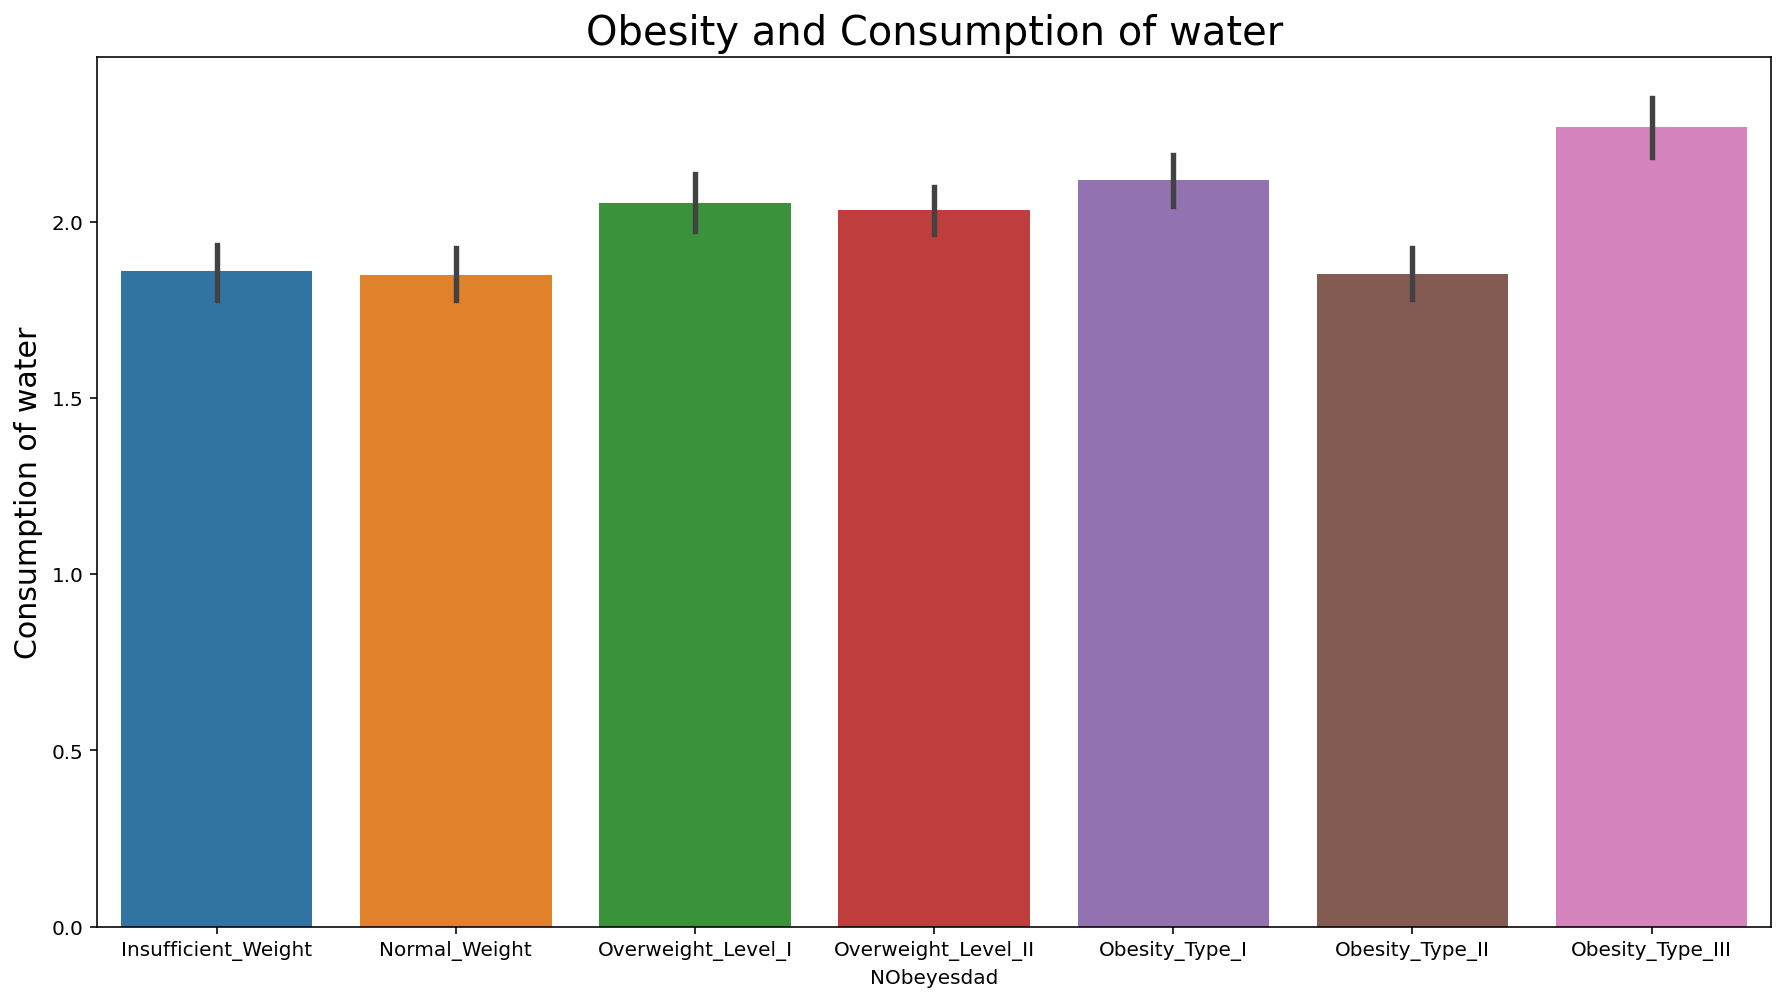

In [100]:
plt.figure(figsize=(15,8))
sns.barplot(x='NObeyesdad',data=ObesityData,y='CH2O',order=['Insufficient_Weight','Normal_Weight','Overweight_Level_I',
'Overweight_Level_II','Obesity_Type_I','Obesity_Type_II','Obesity_Type_III'])
plt.title('Obesity and Consumption of water',fontsize=20)
plt.ylabel('Consumption of water',fontsize=15)
plt.show()

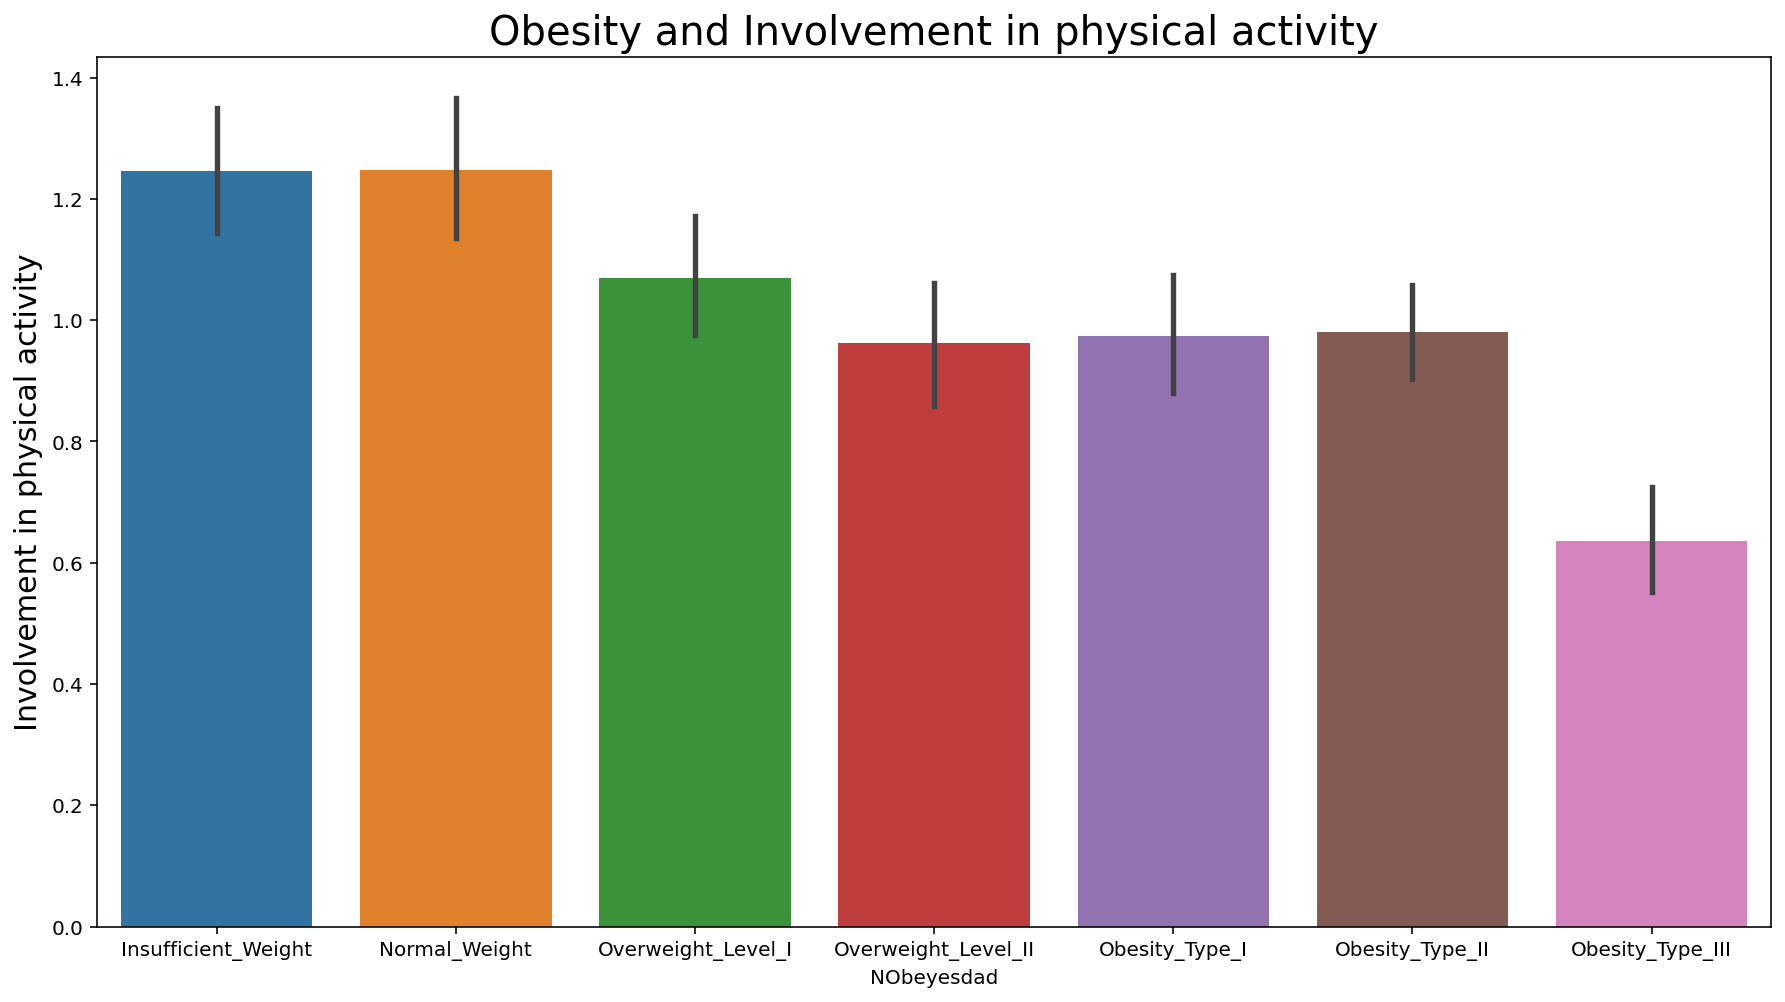

In [101]:
plt.figure(figsize=(15,8))
sns.barplot(x='NObeyesdad',data=ObesityData,y='FAF',order=['Insufficient_Weight','Normal_Weight','Overweight_Level_I',
'Overweight_Level_II','Obesity_Type_I','Obesity_Type_II','Obesity_Type_III'])
plt.title('Obesity and Involvement in physical activity',fontsize=20)
plt.ylabel('Involvement in physical activity',fontsize=15)
plt.show()

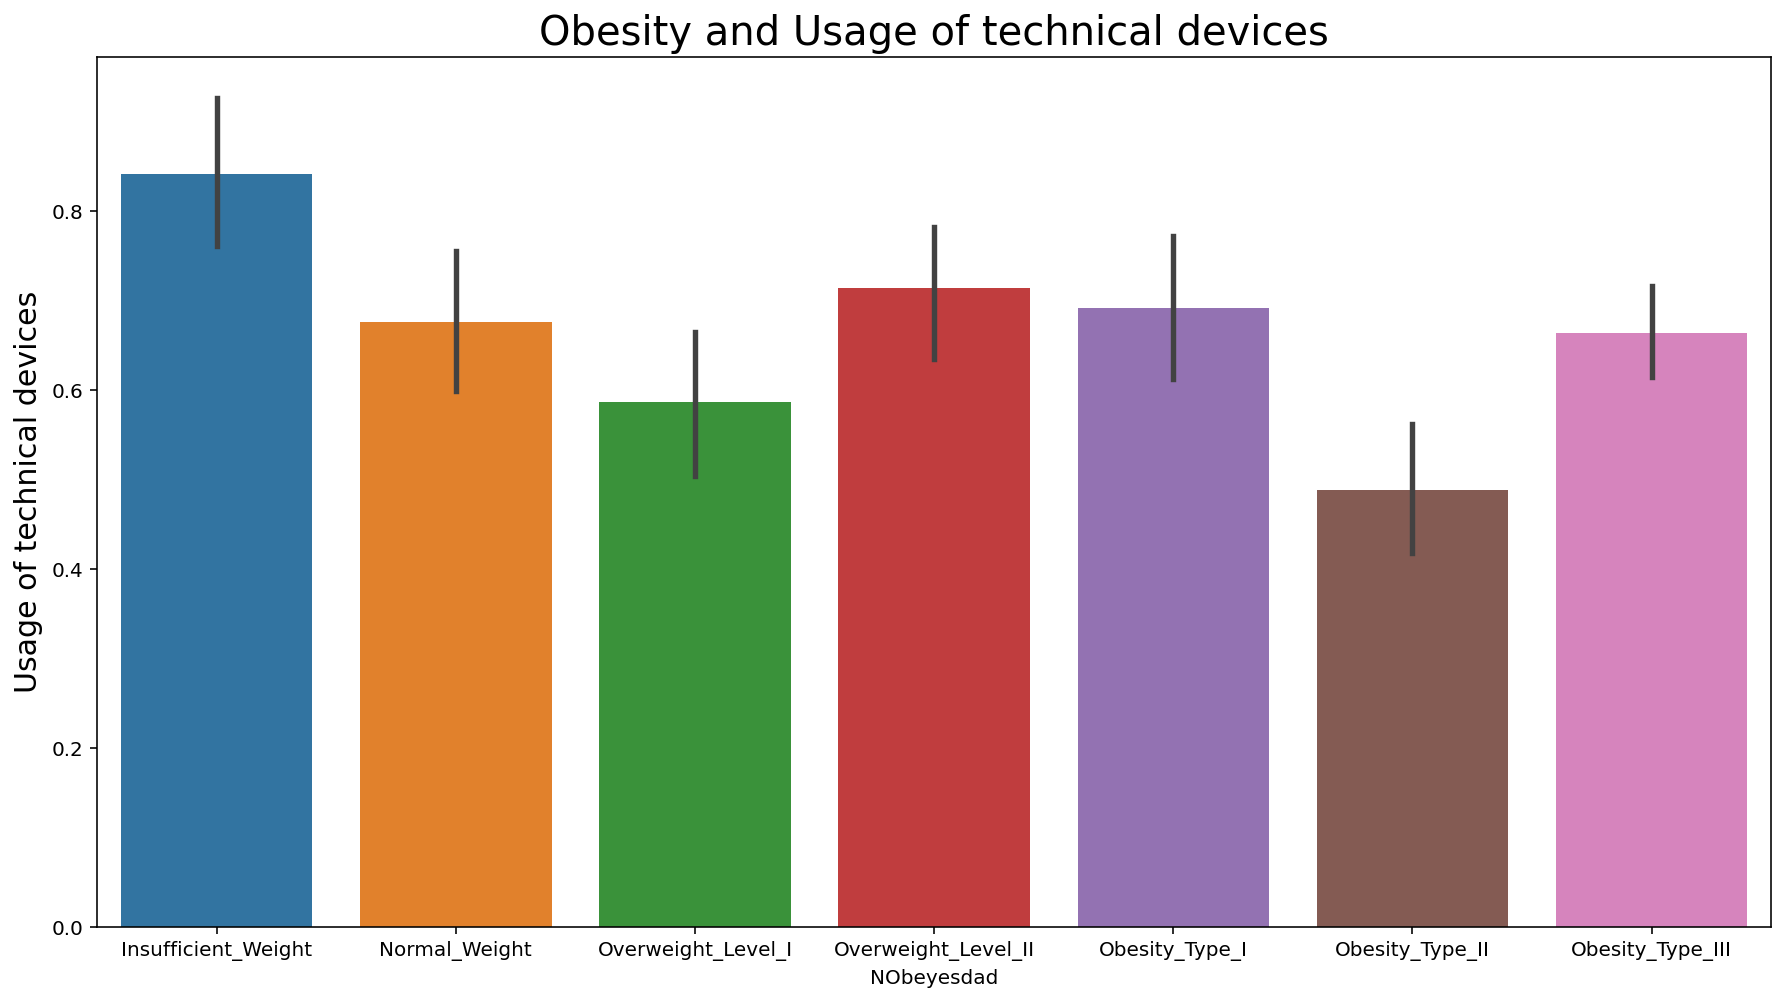

In [102]:
plt.figure(figsize=(15,8))
sns.barplot(x='NObeyesdad',data=ObesityData,y='TUE',order=['Insufficient_Weight','Normal_Weight','Overweight_Level_I',
'Overweight_Level_II','Obesity_Type_I','Obesity_Type_II','Obesity_Type_III'])
plt.title('Obesity and Usage of technical devices',fontsize=20)
plt.ylabel('Usage of technical devices',fontsize=15)
plt.show()

In [103]:
import scipy.stats as stats
from scipy.stats import chi2_contingency

In [104]:
#ob=pd.crosstab(index=ObesityData['NObeyesdad'],columns=ObesityData)
#stat, p, dof, expected = chi2_contingency([[ObesityData['NObeyesdad']],[ObesityData['Gender'],ObesityData['CAEC']]])
data_crosstab = pd.crosstab([ObesityData['SMOKE'], ObesityData['CAEC']], 
                             ObesityData['NObeyesdad'], margins = False)
#print(data_crosstab)
stat, p, dof, expected = chi2_contingency(data_crosstab)
# interpret p-value
alpha = 0.05
print("p value is " + str(p))
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (H0 holds true)')

p value is 1.8059413901317248e-155
Dependent (reject H0)


## Data Preparation

In [105]:
ObesityData.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   Gender                          2111 non-null   category
 1   Age                             2111 non-null   float64 
 2   family_history_with_overweight  2111 non-null   category
 3   FAVC                            2111 non-null   category
 4   FCVC                            2111 non-null   int32   
 5   NCP                             2111 non-null   int32   
 6   CAEC                            2111 non-null   category
 7   SMOKE                           2111 non-null   category
 8   CH2O                            2111 non-null   int32   
 9   SCC                             2111 non-null   category
 10  FAF                             2111 non-null   int32   
 11  TUE                             2111 non-null   int32   
 12  CALC                

In [106]:
#ObesityData = ObesityData.lower()
#varlist =  ['family_history_with_overweight', 'FAVC', 'SMOKE','SCC','Gender']
#ObesityData[varlist]=ObesityData[varlist].astype("|S")

# Defining the map function
#def binary_map(x):
    #return x.map({'yes': 1, "no": 0,'Male':0,'Female':1})

# Applying the function to the housing list
#ObesityData[varlist] = ObesityData[varlist].apply(binary_map)

In [107]:
ObesityData

,Gender,Age,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.000000,yes,no,2,3,Sometimes,no,2,no,0,1,no,Public_Transportation,Normal_Weight
1,Female,21.000000,yes,no,3,3,Sometimes,yes,3,yes,3,0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.000000,yes,no,2,3,Sometimes,no,2,no,2,1,Frequently,Public_Transportation,Normal_Weight
3,Male,27.000000,no,no,3,3,Sometimes,no,2,no,2,0,Frequently,Walking,Overweight_Level_I
4,Male,22.000000,no,no,2,1,Sometimes,no,2,no,0,0,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,yes,yes,3,3,Sometimes,no,2,no,2,1,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21.982942,yes,yes,3,3,Sometimes,no,2,no,1,1,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22.524036,yes,yes,3,3,Sometimes,no,2,no,1,1,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24.361936,yes,yes,3,3,Sometimes,no,3,no,1,1,Sometimes,Public_Transportation,Obesity_Type_III


In [108]:
# check the missing value
round(100*(ObesityData.isnull().sum()/len(ObesityData.index)), 2)    
#ObesityData[ObesityData.isnull().any(axis=1)]


Gender                            0.0
Age                               0.0
family_history_with_overweight    0.0
FAVC                              0.0
FCVC                              0.0
NCP                               0.0
CAEC                              0.0
SMOKE                             0.0
CH2O                              0.0
SCC                               0.0
FAF                               0.0
TUE                               0.0
CALC                              0.0
MTRANS                            0.0
NObeyesdad                        0.0
dtype: float64

In [109]:
# Creating a dummy variable for some of the categorical variables and dropping the first one.
#dummy1 = pd.get_dummies(ObesityData[['CAEC', 'CALC', 'MTRANS']], drop_first=True)

# Adding the results to the master dataframe
#ObesityData = pd.concat([ObesityData, dummy1], axis=1)
df_prep = ObesityData.copy()
df_prep = pd.get_dummies(ObesityData,columns=["Gender","family_history_with_overweight",
                                          "FAVC","CAEC","SMOKE","SCC","CALC","MTRANS"],drop_first=True)
df_prep.head()

,Age,FCVC,NCP,CH2O,FAF,TUE,NObeyesdad,Gender_Male,family_history_with_overweight_yes,FAVC_yes,...,CAEC_no,SMOKE_yes,SCC_yes,CALC_Frequently,CALC_Sometimes,CALC_no,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,21.0,2,3,2,0,1,Normal_Weight,0,1,0,...,0,0,0,0,0,1,0,0,1,0
1,21.0,3,3,3,3,0,Normal_Weight,0,1,0,...,0,1,1,0,1,0,0,0,1,0
2,23.0,2,3,2,2,1,Normal_Weight,1,1,0,...,0,0,0,1,0,0,0,0,1,0
3,27.0,3,3,2,2,0,Overweight_Level_I,1,0,0,...,0,0,0,1,0,0,0,0,0,1
4,22.0,2,1,2,0,0,Overweight_Level_II,1,0,0,...,0,0,0,0,1,0,0,0,1,0


In [110]:
# split dataset in features and target variable

# Features
X = df_prep.drop(columns=["NObeyesdad"])

# Target variable
y = df_prep['NObeyesdad'] 


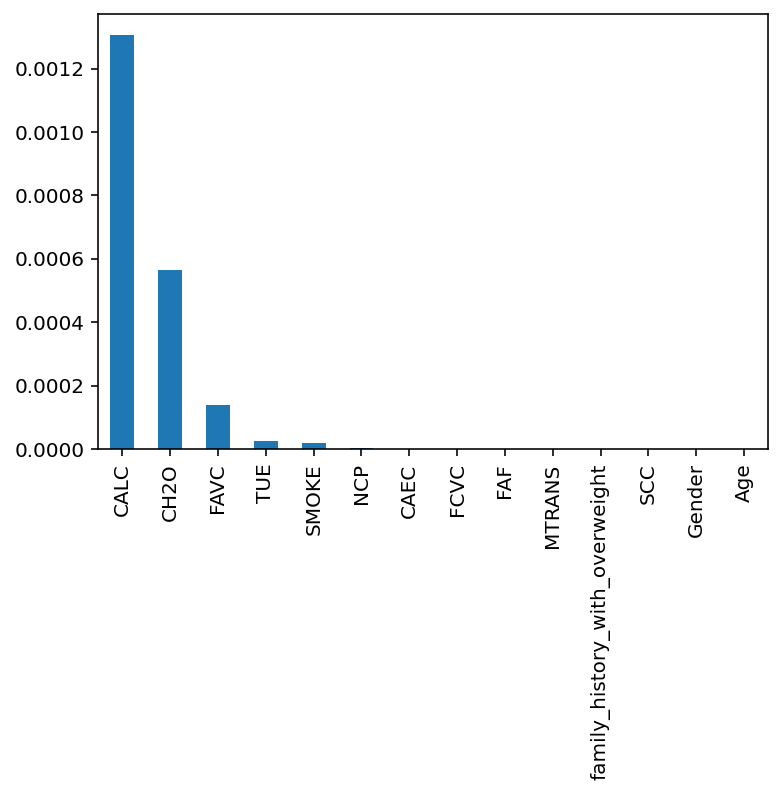

In [111]:
from sklearn.feature_selection import chi2
p_value=chi2(feature,answer)
p_values = pd.Series(p_value[1],index = feature.columns)
p_values.sort_values(ascending = False , inplace = True)
p_values.plot.bar()

In [112]:
df_prep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 22 columns):
 #   Column                              Non-Null Count  Dtype   
---  ------                              --------------  -----   
 0   Age                                 2111 non-null   float64 
 1   FCVC                                2111 non-null   int32   
 2   NCP                                 2111 non-null   int32   
 3   CH2O                                2111 non-null   int32   
 4   FAF                                 2111 non-null   int32   
 5   TUE                                 2111 non-null   int32   
 6   NObeyesdad                          2111 non-null   category
 7   Gender_Male                         2111 non-null   uint8   
 8   family_history_with_overweight_yes  2111 non-null   uint8   
 9   FAVC_yes                            2111 non-null   uint8   
 10  CAEC_Frequently                     2111 non-null   uint8   
 11  CAEC_Sometimes                

In [113]:
df_prep.describe()

,Age,FCVC,NCP,CH2O,FAF,TUE,Gender_Male,family_history_with_overweight_yes,FAVC_yes,CAEC_Frequently,...,CAEC_no,SMOKE_yes,SCC_yes,CALC_Frequently,CALC_Sometimes,CALC_no,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,...,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,2.423496,2.687826,2.014685,1.006632,0.664614,0.505921,0.817622,0.883941,0.114638,...,0.024159,0.020843,0.045476,0.033160,0.663667,0.302700,0.003316,0.005211,0.748460,0.026528
std,6.345968,0.583905,0.809680,0.688616,0.895462,0.674009,0.500083,0.386247,0.320371,0.318660,...,0.153580,0.142893,0.208395,0.179096,0.472566,0.459535,0.057502,0.072015,0.434001,0.160737
min,14.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.947192,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,22.777890,2.000000,3.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,26.000000,3.000000,3.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
max,61.000000,3.000000,4.000000,3.000000,3.000000,2.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [114]:
df_prep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 22 columns):
 #   Column                              Non-Null Count  Dtype   
---  ------                              --------------  -----   
 0   Age                                 2111 non-null   float64 
 1   FCVC                                2111 non-null   int32   
 2   NCP                                 2111 non-null   int32   
 3   CH2O                                2111 non-null   int32   
 4   FAF                                 2111 non-null   int32   
 5   TUE                                 2111 non-null   int32   
 6   NObeyesdad                          2111 non-null   category
 7   Gender_Male                         2111 non-null   uint8   
 8   family_history_with_overweight_yes  2111 non-null   uint8   
 9   FAVC_yes                            2111 non-null   uint8   
 10  CAEC_Frequently                     2111 non-null   uint8   
 11  CAEC_Sometimes                

In [115]:
# import sklearn packages for data treatments
from sklearn.model_selection import train_test_split # Import train_test_split function

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

In [116]:
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.preprocessing import StandardScaler # Import for standard scaling of the data
from sklearn.preprocessing import MinMaxScaler # Import for standard scaling of the data 

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score


# Model
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier

from xgboost import XGBClassifier

import tensorflow as tf

from tensorflow import keras

from keras.models import Sequential

from keras.layers import Dense


# result
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score

#retina
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

In [117]:
# standard scale data
ss = StandardScaler()
X_train_scaled = ss.fit_transform(X_train) 
X_test_scaled = ss.transform(X_test) 

# tested MinMaxScaler as KNN historically does better with MinMax 
mm = MinMaxScaler() 
X_train_mm_scaled = ss.fit_transform(X_train) 
X_test_mm_scaled = ss.transform(X_test) 

# program to run multilple models though sklearn 
# Default settings output accuracy and classification report
# compares accuracy for scaled and unscaled data
Algo = ['Random_Forest',
        'Decision_Tree',
        'KNN',
        'XGBoost',
        'SVM',
        'ANN']
Accuracy=[]
Precision=[]
Recall=[]
F1Score=[]
def run_models():
    
    models = [          
          ('Random_Forest', RandomForestClassifier(random_state=2020)),
          ('Decision_Tree', DecisionTreeClassifier()),                                                 
          ('KNN', KNeighborsClassifier()),
          ('XGBoost',XGBClassifier()),
          ('SVM', SVC())
        ]  
    
    for name, model in models:        
        # unscaled data
        clf = model.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        
        # scaled data
        clf_scaled = model.fit(X_train_scaled, y_train)
        y_pred_scaled = clf_scaled.predict(X_test_scaled)
        
        # mm scaled data
        clf_mm_scaled = model.fit(X_train_mm_scaled, y_train)
        y_pred_mm_scaled = clf_scaled.predict(X_test_mm_scaled)
        
        # accuracy scores
        accuracy = round(metrics.accuracy_score(y_test, y_pred),2)
        confusion = metrics.confusion_matrix(y_test, y_pred)
        scaled_accuracy = round(metrics.accuracy_score(y_test, y_pred_scaled),2)
        scaled_mm_accuracy = round(metrics.accuracy_score(y_test, y_pred_mm_scaled),2)
        
        # output
        print(name + ':')        
        print("---------------------------------------------------------------")      
        print("Accuracy:", accuracy)
        #print("Confusion Matrix:", confusion)
        print("Accuracy w/Scaled Data (ss):", scaled_accuracy)
        print("Accuracy w/Scaled Data (mm):", scaled_mm_accuracy)
        print("                            -----------------------------------               \n")      
        print('Precision score: ',round(precision_score(y_test,y_pred,average='macro'),2))
        print('Precision w/Scaled Data (ss): ',round(precision_score(y_test,y_pred_scaled,average='macro'),2))
        print('Precision score: ',round(precision_score(y_test,y_pred_mm_scaled,average='macro'),2))
        print("                            -----------------------------------               \n")      
        print('Recall: ', round(recall_score(y_test,y_pred,average='macro'),2))
        print('Recall w/Scaled Data (ss): ', round(recall_score(y_test,y_pred_scaled,average='macro'),2))
        print('Recall w/Scaled Data (mm): ', round(recall_score(y_test,y_pred_mm_scaled,average='macro'),2))
        print("                            -----------------------------------               \n")      
        print('F1 score: ',round(f1_score(y_test,y_pred,average='macro'),2))
        print('F1 score w/Scaled Data (ss): ',round(f1_score(y_test,y_pred_scaled,average='macro'),2))
        print('F1 score w/Scaled Data (mm): ',round(f1_score(y_test,y_pred_mm_scaled,average='macro'),2))
        print("                            -----------------------------------               \n")      
        if (accuracy > scaled_accuracy) and (accuracy > scaled_mm_accuracy):
            print("\nClassification Report:\n", metrics.classification_report(y_test, y_pred))   
            Accuracy.append(accuracy)
            Precision.append(round(precision_score(y_test,y_pred,average='macro'),2))
            Recall.append(round(recall_score(y_test,y_pred,average='macro'),2))
            F1Score.append(round(f1_score(y_test,y_pred,average='macro'),2))

            print("                            -----------------------------------               \n")      
        elif (scaled_accuracy > scaled_mm_accuracy):
            print("\nClassification Report (ss):\n", metrics.classification_report(y_test, y_pred_scaled))   
            Accuracy.append(scaled_accuracy)
            Precision.append(round(precision_score(y_test,y_pred_scaled,average='macro'),2))
            Recall.append(round(recall_score(y_test,y_pred_scaled,average='macro'),2))
            F1Score.append(round(f1_score(y_test,y_pred_scaled,average='macro'),2))
            print("                            -----------------------------------               \n")     
        else:            
            print("\nClassification Report (mm):\n", metrics.classification_report(y_test, y_pred_mm_scaled))   
            Accuracy.append(scaled_mm_accuracy)
            Precision.append(round(precision_score(y_test,y_pred_mm_scaled,average='macro'),2))
            Recall.append(round(recall_score(y_test,y_pred_mm_scaled,average='macro'),2))
            F1Score.append(round(f1_score(y_test,y_pred_mm_scaled,average='macro'),2))
            print("                            -----------------------------------               \n")      
#run Decision Trees, Random Forest, KNN and SVM
run_models()  


Random_Forest:
---------------------------------------------------------------
Accuracy: 0.82
Accuracy w/Scaled Data (ss): 0.82
Accuracy w/Scaled Data (mm): 0.82
                            -----------------------------------               

Precision score:  0.81
Precision w/Scaled Data (ss):  0.81
Precision score:  0.81
                            -----------------------------------               

Recall:  0.81
Recall w/Scaled Data (ss):  0.82
Recall w/Scaled Data (mm):  0.82
                            -----------------------------------               

F1 score:  0.81
F1 score w/Scaled Data (ss):  0.81
F1 score w/Scaled Data (mm):  0.81
                            -----------------------------------               


Classification Report (mm):
                      precision    recall  f1-score   support

Insufficient_Weight       0.86      0.87      0.86        92
      Normal_Weight       0.60      0.69      0.64        77
     Obesity_Type_I       0.84      0.76      0.80      

C:\Users\jyoti\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:24:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:24:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBoost:
---------------------------------------------------------------
Accuracy: 0.81
Accuracy w/Scaled Data (ss): 0.81
Accuracy w/Scaled Data (mm): 0.81
                            -----------------------------------               

Precision score:  0.81
Precision w/Scaled Data (ss):  0.81
Precision score:  0.81
                            --------------------------------

C:\Users\jyoti\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [118]:
# xtrain,xtest,ytrain,ytest = train_test_split(feature,answer,test_size=0.3,random_state=42)

# scaler = StandardScaler()
# xtrain = scaler.fit_transform(xtrain)
# xtest = scaler.fit_transform(xtest)

param_grid = {'hidden_layer_sizes': [(16,),(32,),(48,)],
    'activation': ['logistic', 'relu',  'tanh'],
    'solver': ['sgd', 'adam'],
    'learning_rate': ['constant','adaptive'],
    'learning_rate_init':[0.001,0.1,0.2]
}

grid = GridSearchCV(MLPClassifier(random_state=42),param_grid=param_grid,cv=5)
grid.fit(X_train_scaled, y_train)
print(grid.best_params_)


C:\Users\jyoti\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\jyoti\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\jyoti\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\jyoti\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, Conv

C:\Users\jyoti\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\jyoti\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\jyoti\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\jyoti\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, Conv

C:\Users\jyoti\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\jyoti\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\jyoti\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\jyoti\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, Conv

C:\Users\jyoti\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\jyoti\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\jyoti\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\jyoti\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, Conv

C:\Users\jyoti\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\jyoti\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\jyoti\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\jyoti\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, Conv

C:\Users\jyoti\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\jyoti\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\jyoti\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\jyoti\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, Conv

C:\Users\jyoti\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\jyoti\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\jyoti\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\jyoti\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, Conv

C:\Users\jyoti\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\jyoti\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\jyoti\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\jyoti\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, Conv

C:\Users\jyoti\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\jyoti\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\jyoti\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\jyoti\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, Conv

C:\Users\jyoti\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\jyoti\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\jyoti\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\jyoti\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, Conv

C:\Users\jyoti\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\jyoti\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\jyoti\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\jyoti\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, Conv

{'activation': 'logistic', 'hidden_layer_sizes': (32,), 'learning_rate': 'constant', 'learning_rate_init': 0.1, 'solver': 'sgd'}


C:\Users\jyoti\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [119]:
clf = MLPClassifier(random_state=42, activation='logistic',hidden_layer_sizes=(32,),learning_rate='constant',learning_rate_init=0.1,solver='sgd')
clf.fit(X_train_scaled, y_train)
y_pred = clf.predict(X_test_scaled)
y_prob = clf.predict_proba(X_test_scaled)

#mapping = dict(zip(le.classes_, range(0, len(le.classes_)+1)))


cm = confusion_matrix(y_test,y_pred)
#cm_df = pd.DataFrame(cm,index=mapping)

#plt.figure(figsize=(8,6))                  
#sns.heatmap(cm_df, annot=True)
# plt.title('The accuracy of Neural network (MLP) (Best param): {0:.3f}'.format(accuracy_score(y_test,y_pred)),fontsize=13)
# plt.ylabel('Actual label')
# plt.xlabel('Predicted label',)
# plt.show()

print('Accuracy score: ', round(accuracy_score(y_test,y_pred),2))
print('Precision score: ',round(precision_score(y_test,y_pred,average='macro'),2))
print('Recall: ', round(recall_score(y_test,y_pred,average='macro'),2))
print('F1 score: ',round(f1_score(y_test,y_pred,average='macro'),2))
print('ROC-AUC score',round(roc_auc_score(y_test, y_prob, multi_class="ovo",
                                  average="macro"),2))
print("\nClassification Report (ss):\n", metrics.classification_report(y_test, y_pred))      
Accuracy.append(round(accuracy_score(y_test,y_pred),2))
Precision.append(round(precision_score(y_test,y_pred,average='macro'),2))
Recall.append(round(recall_score(y_test,y_pred,average='macro'),2))
F1Score.append(round(f1_score(y_test,y_pred,average='macro'),2))

Accuracy score:  0.74
Precision score:  0.74
Recall:  0.74
F1 score:  0.74
ROC-AUC score 0.93

Classification Report (ss):
                      precision    recall  f1-score   support

Insufficient_Weight       0.82      0.80      0.81        92
      Normal_Weight       0.51      0.61      0.55        77
     Obesity_Type_I       0.75      0.70      0.72       114
    Obesity_Type_II       0.86      0.89      0.88        85
   Obesity_Type_III       0.99      0.98      0.98        92
 Overweight_Level_I       0.65      0.58      0.62        89
Overweight_Level_II       0.62      0.62      0.62        85

           accuracy                           0.74       634
          macro avg       0.74      0.74      0.74       634
       weighted avg       0.75      0.74      0.75       634



C:\Users\jyoti\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [120]:
#model name, classifier, parameters
# function used to process models and parameters through gridsearch
def hyper_tune(name, clf, parameters, target_names=None): 
    
    target_names = target_names
    clf = clf
    search = GridSearchCV(clf, parameters,verbose=True, n_jobs=15, cv=5)
    search.fit(X_train_scaled,y_train)
    y_pred_scaled = search.predict(X_test_scaled)
    print ("Accuracy Score = %3.2f" %(search.score(X_test_scaled,y_test)))
    print (search.best_params_)
    print("\nClassification Report:\n", metrics.classification_report(y_test, y_pred_scaled, target_names=target_names))
    print('Precision w/Scaled Data (ss): ',round(precision_score(y_test,y_pred_scaled,average='macro'),2))    
    print('Recall w/Scaled Data (ss): ', round(recall_score(y_test,y_pred_scaled,average='macro'),2))    
    print('F1 score w/Scaled Data (ss): ',round(f1_score(y_test,y_pred_scaled,average='macro'),2))


In [121]:
#the KNN model performs better on the unscaled data this function
# function for unscaled data
#model name, classifier, parameters
# function used to process models and parameters through gridsearch
def hyper_tune2(name, clf, parameters, target_names=None): 
    
    target_names = target_names
    clf = clf
    search = GridSearchCV(clf, parameters,verbose=True, n_jobs=15, cv=5)
    search.fit(X_train,y_train)
    y_pred = search.predict(X_test)
    print ("Accuracy Score = %3.2f" %(search.score(X_test,y_test)))
    print (search.best_params_)
    print("\nClassification Report:\n", metrics.classification_report(y_test, y_pred, target_names=target_names))
    print('Precision score: ',round(precision_score(y_test,y_pred,average='macro'),2))
    print('Recall: ', round(recall_score(y_test,y_pred,average='macro'),2))
    print('F1 score: ',round(f1_score(y_test,y_pred,average='macro'),2))


In [122]:
# Number of neighbors
n_neighbors = [int(x) for x in range(4, 15)]
# weights
weights = ['uniform','distance']
# distance metric
metric = ['euclidean', 'manhattan', 'chebyshev']
# computation algorithm
algorithm = ['auto', 'ball_tree', 'kd_tree', 'brute']
# power paramter
p=[1,2]

parameters = { 'n_neighbors': n_neighbors,
              'weights':weights,
              'metric':metric,
              'p':p,
              'algorithm': algorithm              
               }

hyper_tune2('KNN', KNeighborsClassifier(), parameters)

Fitting 5 folds for each of 528 candidates, totalling 2640 fits


[Parallel(n_jobs=15)]: Using backend LokyBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    4.1s
[Parallel(n_jobs=15)]: Done 305 tasks      | elapsed:    6.0s
[Parallel(n_jobs=15)]: Done 1305 tasks      | elapsed:   10.7s


Accuracy Score = 0.79
{'algorithm': 'ball_tree', 'metric': 'manhattan', 'n_neighbors': 4, 'p': 1, 'weights': 'distance'}

Classification Report:
                      precision    recall  f1-score   support

Insufficient_Weight       0.78      0.82      0.80        92
      Normal_Weight       0.69      0.43      0.53        77
     Obesity_Type_I       0.78      0.82      0.80       114
    Obesity_Type_II       0.83      0.95      0.89        85
   Obesity_Type_III       0.91      1.00      0.95        92
 Overweight_Level_I       0.78      0.74      0.76        89
Overweight_Level_II       0.69      0.69      0.69        85

           accuracy                           0.79       634
          macro avg       0.78      0.78      0.77       634
       weighted avg       0.78      0.79      0.78       634

Precision score:  0.78
Recall:  0.78
F1 score:  0.77


[Parallel(n_jobs=15)]: Done 2640 out of 2640 | elapsed:   16.7s finished


In [123]:
# Number of trees in random forest
n_estimators = [int(x) for x in range(10, 200,10)]
# Criterion
criterion = ['gini','entropy']
# Number of features to consider at every split
max_features = ['auto', 'sqrt', 'log2']
# Maximum number of levels in tree
max_depth = [int(x) for x in range(10, 100, 10)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [int(x) for x in range(2, 5)]
# Minimum number of samples required at each leaf node
min_samples_leaf = [int(x) for x in range(2, 5)]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# random state
random_state = [1010]

parameters = { 'criterion':criterion,
               'n_estimators': n_estimators,
              'max_depth':max_depth,
              #'random_state': random_state,
              #'max_features':max_features,
              #'min_samples_split':min_samples_split             
               }


hyper_tune('Random Forest',
           RandomForestClassifier(), parameters)


Fitting 5 folds for each of 380 candidates, totalling 1900 fits


[Parallel(n_jobs=15)]: Using backend LokyBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.5s
[Parallel(n_jobs=15)]: Done 215 tasks      | elapsed:   10.3s
[Parallel(n_jobs=15)]: Done 465 tasks      | elapsed:   25.1s
[Parallel(n_jobs=15)]: Done 815 tasks      | elapsed:   43.1s
[Parallel(n_jobs=15)]: Done 1265 tasks      | elapsed:  1.1min
[Parallel(n_jobs=15)]: Done 1815 tasks      | elapsed:  1.7min
[Parallel(n_jobs=15)]: Done 1900 out of 1900 | elapsed:  1.8min finished


Accuracy Score = 0.83
{'criterion': 'gini', 'max_depth': 70, 'n_estimators': 130}

Classification Report:
                      precision    recall  f1-score   support

Insufficient_Weight       0.84      0.87      0.86        92
      Normal_Weight       0.58      0.68      0.62        77
     Obesity_Type_I       0.88      0.80      0.83       114
    Obesity_Type_II       0.92      0.94      0.93        85
   Obesity_Type_III       0.99      0.99      0.99        92
 Overweight_Level_I       0.81      0.73      0.77        89
Overweight_Level_II       0.77      0.78      0.77        85

           accuracy                           0.83       634
          macro avg       0.83      0.83      0.82       634
       weighted avg       0.83      0.83      0.83       634

Precision w/Scaled Data (ss):  0.83
Recall w/Scaled Data (ss):  0.83
F1 score w/Scaled Data (ss):  0.82


In [124]:
# Create Decision Tree classifer object with optimized parameters
clf = RandomForestClassifier(criterion='entropy',
               n_estimators=52,
              max_depth = 51,              
              max_features='auto',
              min_samples_split=2,
              random_state=1010)

# Train Decision Tree Classifer
clf = clf.fit(X_train_scaled,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test_scaled)
print(X.columns)


Index(['Age', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE', 'Gender_Male',
       'family_history_with_overweight_yes', 'FAVC_yes', 'CAEC_Frequently',
       'CAEC_Sometimes', 'CAEC_no', 'SMOKE_yes', 'SCC_yes', 'CALC_Frequently',
       'CALC_Sometimes', 'CALC_no', 'MTRANS_Bike', 'MTRANS_Motorbike',
       'MTRANS_Public_Transportation', 'MTRANS_Walking'],
      dtype='object')


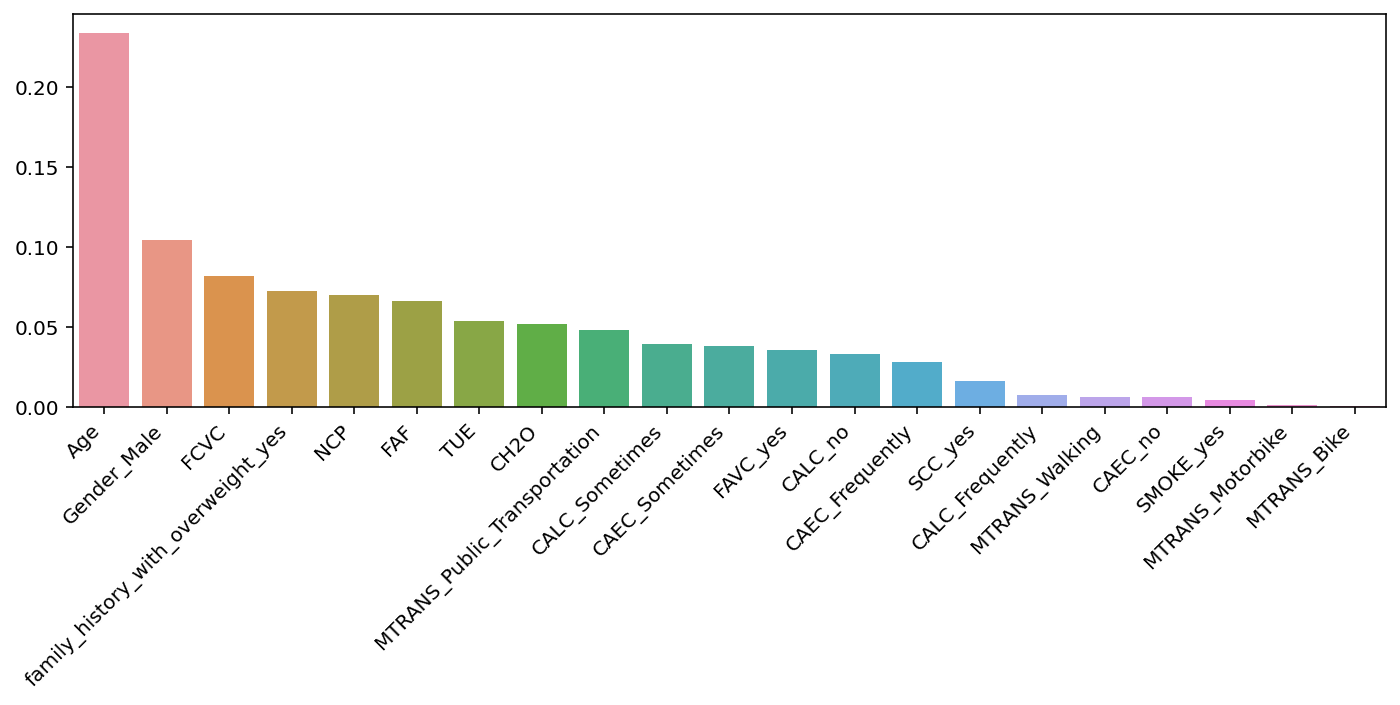


Top 10 Features:
Variable: Age                  Importance: 0.23
Variable: Gender_Male          Importance: 0.1
Variable: FCVC                 Importance: 0.08
Variable: NCP                  Importance: 0.07
Variable: FAF                  Importance: 0.07
Variable: family_history_with_overweight_yes Importance: 0.07
Variable: CH2O                 Importance: 0.05
Variable: TUE                  Importance: 0.05
Variable: MTRANS_Public_Transportation Importance: 0.05
Variable: FAVC_yes             Importance: 0.04

Bottom 10 Features:
Variable: SMOKE_yes            Importance: 0.0
Variable: MTRANS_Bike          Importance: 0.0
Variable: MTRANS_Motorbike     Importance: 0.0
Variable: CAEC_no              Importance: 0.01
Variable: CALC_Frequently      Importance: 0.01
Variable: MTRANS_Walking       Importance: 0.01
Variable: SCC_yes              Importance: 0.02
Variable: CAEC_Frequently      Importance: 0.03
Variable: CALC_no              Importance: 0.03
Variable: FAVC_yes             

In [125]:
feature_imp = pd.Series(clf.feature_importances_, index=X.columns).sort_values(ascending=False)
fig = plt.figure(figsize=(10, 5))

# Creating a bar plot
sns.barplot(x=feature_imp.index, y=feature_imp)

# Add labels to your graph
plt.xticks(rotation=45, horizontalalignment='right')

plt.tight_layout()
plt.show()

# create features list
features_list = X.columns
features_list = features_list.tolist()

# Get numerical feature importances
importances = list(clf.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(features_list, importances)]

# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
print("\nTop 10 Features:")
display_top = [print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances[:10]]

# Sort the feature importances by least important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = False)
# Print out the feature and importances 
print("\nBottom 10 Features:")
display_bottom = [print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances[:10]]


### Ends here

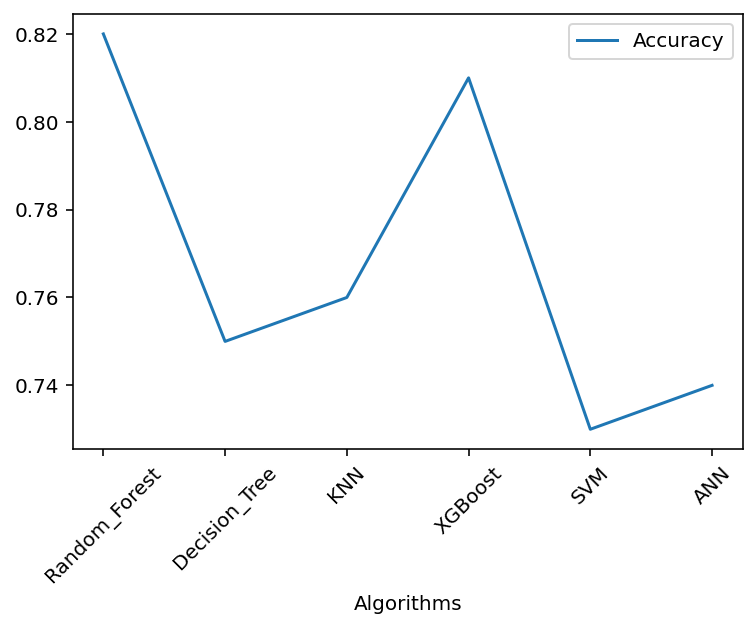

In [126]:
data={'Accuracy':Accuracy,'Precision':Precision,'Recall':Recall,'F1Score':F1Score,'Algorithms':Algo}
AlgoResults = pd.DataFrame(data, index =Algo)
AlgoResults
AlgoResults.plot(x ='Algorithms', y=['Accuracy'], kind = 'line')
plt.xticks(rotation=45)
plt.show()
# AlgoResults.plot(x ='Random_Forest', y='Accuracy', kind = 'bar')
# plt.show()

<Figure size 1080x576 with 0 Axes>

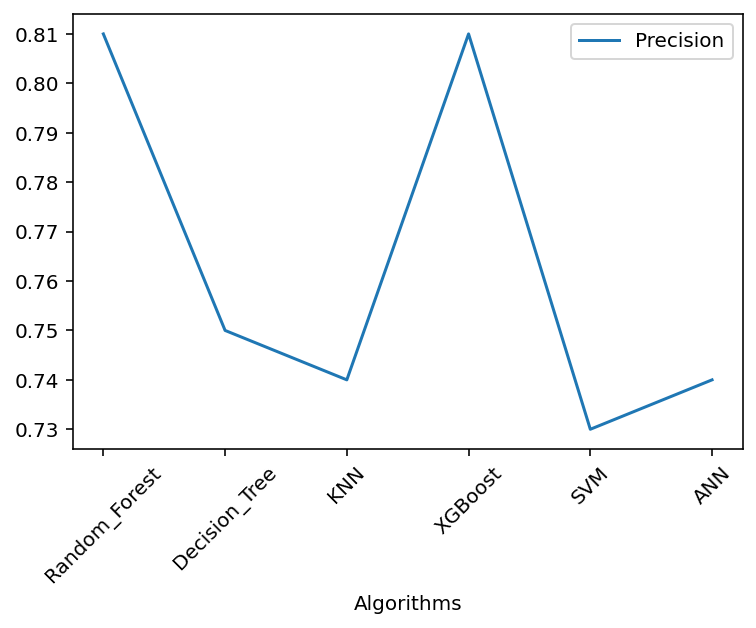

In [127]:
plt.figure(figsize=(15,8))
AlgoResults.plot(x ='Algorithms', y=['Precision'], kind = 'line')
plt.xticks(rotation=45)
plt.show()


<Figure size 1080x576 with 0 Axes>

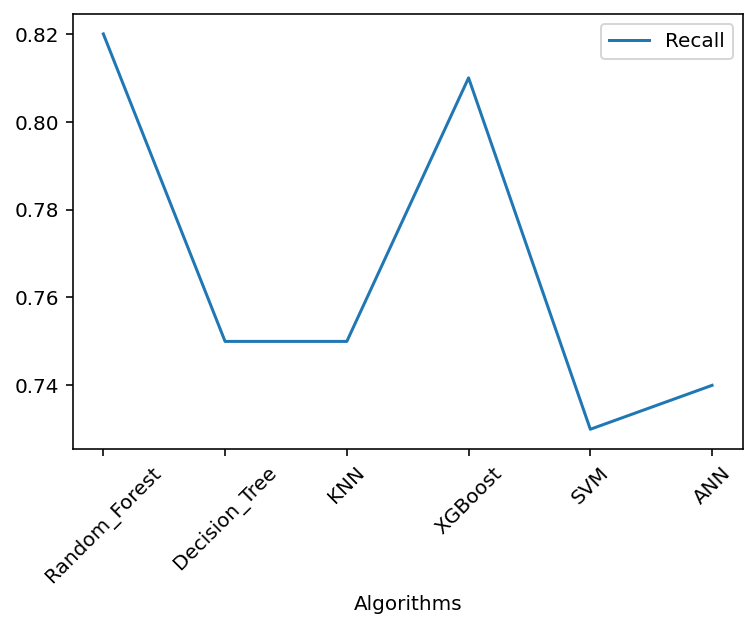

In [128]:
plt.figure(figsize=(15,8))
AlgoResults.plot(x ='Algorithms', y=['Recall'], kind = 'line')
plt.xticks(rotation=45)
plt.show()

<Figure size 1080x576 with 0 Axes>

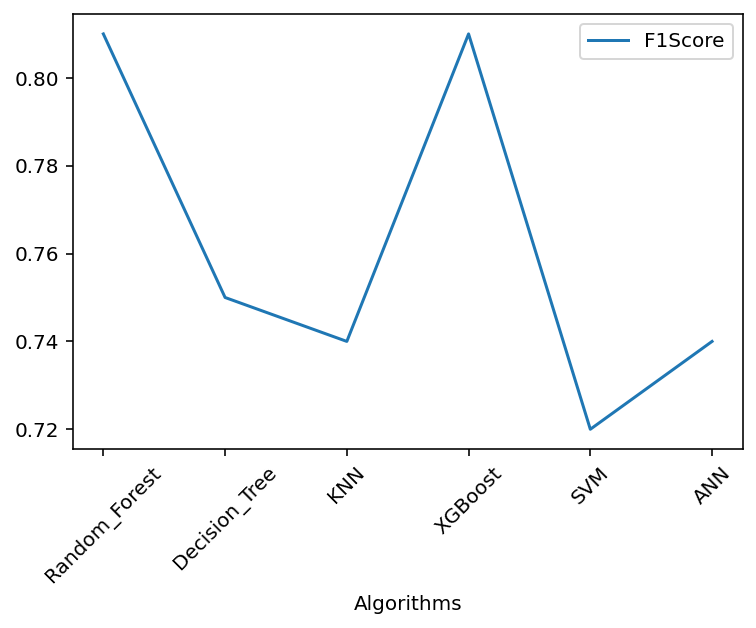

In [129]:
plt.figure(figsize=(15,8))

AlgoResults.plot(x ='Algorithms', y=['F1Score'], kind = 'line')
plt.xticks(rotation=45)

plt.show()

In [63]:
from sklearn.tree import export_graphviz
features = list(hvc_df6.columns[1:])

NameError: name 'hvc_df6' is not defined

In [ ]:

# map values 
weight_map = { 'Normal_Weight':0, 'Overweight_Level_I':0,
               'Overweight_Level_II':0, 'Obesity_Type_I':1,
               'Obesity_Type_II':1, 'Obesity_Type_III':1, 'Insufficient_Weight':0}

# map values
df_prep['weight_cat'] = df_prep['NObeyesdad'].map(weight_map)
sns.countplot(x="weight_cat",                  
                 palette="Blues_d", 
                 order=df_prep["weight_cat"].value_counts().index,                 
                 data=df_prep)


# show figure & plots
plt.tight_layout()
plt.show()


In [122]:
# split dataset in features and target variable

# Features
X = df_prep.drop(columns=["NObeyesdad","weight_cat"])

# Target variable
y = df_prep['weight_cat'] 
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

# Scaled version of X train and X test
ss = StandardScaler()
X_train_scaled = ss.fit_transform(X_train)
X_test_scaled = ss.transform(X_test)


In [123]:
# Number of trees in random forest
n_estimators = [int(x) for x in range(10, 200,10)]
# Criterion
criterion = ['gini','entropy']
# Number of features to consider at every split
max_features = ['auto', 'sqrt', 'log2']
# Maximum number of levels in tree
max_depth = [int(x) for x in range(10, 100, 10)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [int(x) for x in range(2, 20,2)]
# Minimum number of samples required at each leaf node
min_samples_leaf = [int(x) for x in range(2, 20, 2)]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# random state
random_state = [1010]

target_names = ['Not Obese', 'Obese']

parameters = { 'criterion':criterion,
               'n_estimators': n_estimators,
              'max_depth':max_depth,
              'random_state': random_state,
              'max_features':max_features
              #'min_samples_split':min_samples_split             
               }

hyper_tune('Random Forest', RandomForestClassifier(), parameters, target_names=target_names)

Fitting 5 folds for each of 1140 candidates, totalling 5700 fits


[Parallel(n_jobs=15)]: Using backend LokyBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    0.3s
[Parallel(n_jobs=15)]: Done 230 tasks      | elapsed:    8.0s
[Parallel(n_jobs=15)]: Done 480 tasks      | elapsed:   18.6s
[Parallel(n_jobs=15)]: Done 830 tasks      | elapsed:   32.7s
[Parallel(n_jobs=15)]: Done 1280 tasks      | elapsed:   50.5s
[Parallel(n_jobs=15)]: Done 1830 tasks      | elapsed:  1.2min
[Parallel(n_jobs=15)]: Done 2480 tasks      | elapsed:  1.6min
[Parallel(n_jobs=15)]: Done 3230 tasks      | elapsed:  2.1min
[Parallel(n_jobs=15)]: Done 4080 tasks      | elapsed:  2.7min
[Parallel(n_jobs=15)]: Done 5030 tasks      | elapsed:  3.4min
[Parallel(n_jobs=15)]: Done 5700 out of 5700 | elapsed:  3.9min finished


Accuracy Score = 0.93
{'criterion': 'entropy', 'max_depth': 20, 'max_features': 'auto', 'n_estimators': 160, 'random_state': 1010}

Classification Report:
               precision    recall  f1-score   support

   Not Obese       0.91      0.96      0.93       343
       Obese       0.95      0.89      0.92       291

    accuracy                           0.93       634
   macro avg       0.93      0.92      0.93       634
weighted avg       0.93      0.93      0.93       634



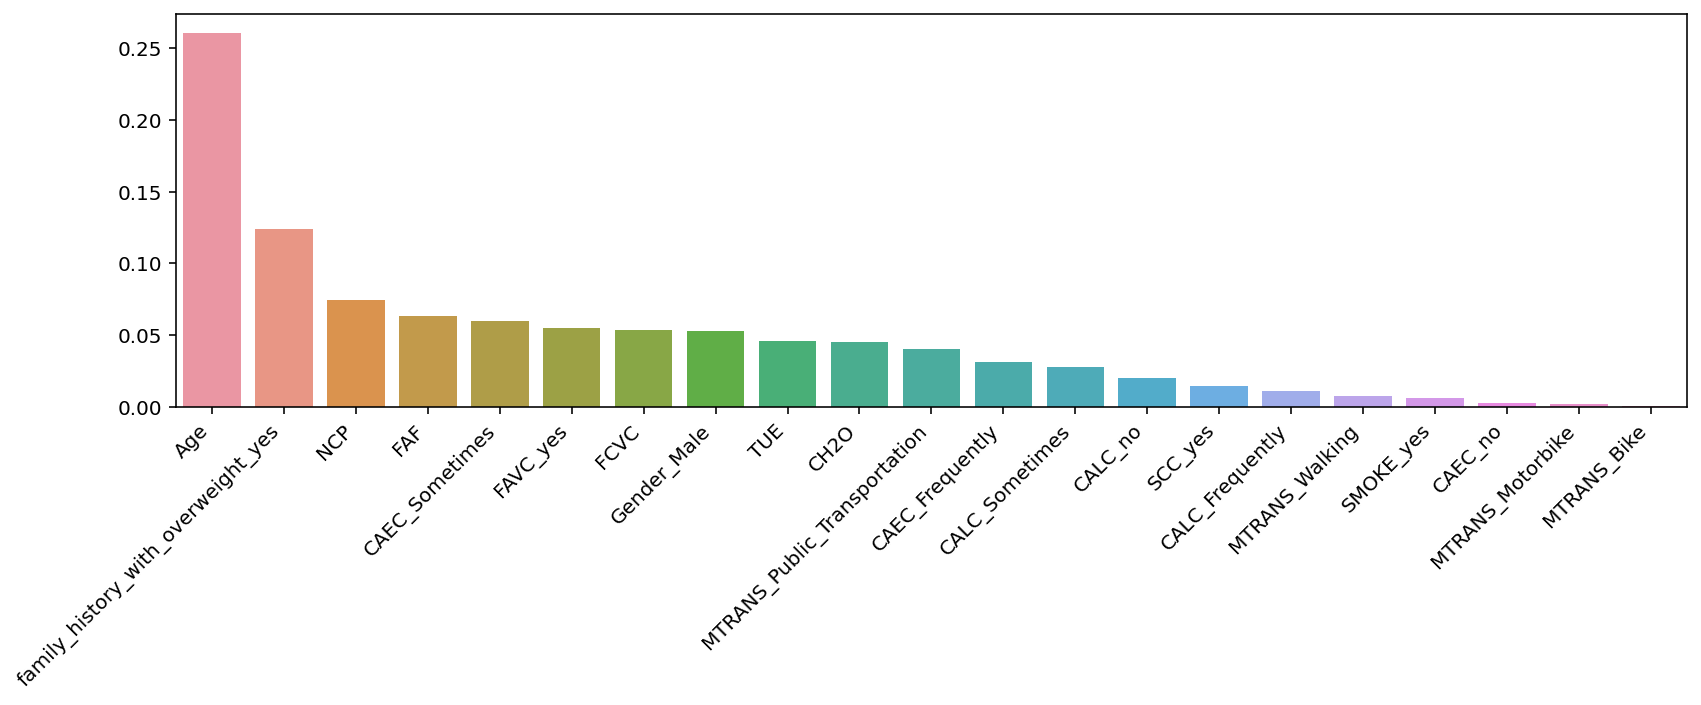


Top 10 Features:
Variable: Age                  Importance: 0.26
Variable: family_history_with_overweight_yes Importance: 0.12
Variable: NCP                  Importance: 0.07
Variable: FAF                  Importance: 0.06
Variable: CAEC_Sometimes       Importance: 0.06
Variable: FCVC                 Importance: 0.05
Variable: CH2O                 Importance: 0.05
Variable: TUE                  Importance: 0.05
Variable: Gender_Male          Importance: 0.05
Variable: FAVC_yes             Importance: 0.05

Bottom 10 Features:
Variable: CAEC_no              Importance: 0.0
Variable: MTRANS_Bike          Importance: 0.0
Variable: MTRANS_Motorbike     Importance: 0.0
Variable: SMOKE_yes            Importance: 0.01
Variable: SCC_yes              Importance: 0.01
Variable: CALC_Frequently      Importance: 0.01
Variable: MTRANS_Walking       Importance: 0.01
Variable: CALC_no              Importance: 0.02
Variable: CAEC_Frequently      Importance: 0.03
Variable: CALC_Sometimes       Importa

In [124]:
# Create Random Forest classifer object with optimized parameters
clf = RandomForestClassifier(criterion='gini',
               n_estimators=110,
              max_depth = 20,              
              max_features='auto',              
              random_state=1010)

# Train Random Forest classifer
clf = clf.fit(X_train_scaled,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test_scaled)
feature_imp = pd.Series(clf.feature_importances_, index=X.columns).sort_values(ascending=False)
fig = plt.figure(figsize=(12, 5))

# Creating a bar plot
sns.barplot(x=feature_imp.index, y=feature_imp)

# Add labels to your graph
plt.xticks(rotation=45, horizontalalignment='right')

plt.tight_layout()
plt.show()

# create features list
features_list = X.columns
features_list = features_list.tolist()

# Get numerical feature importances
importances = list(clf.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(features_list, importances)]

# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
print("\nTop 10 Features:")
display_top = [print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances[:10]]

# Sort the feature importances by least important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = False)
# Print out the feature and importances 
print("\nBottom 10 Features:")
display_bottom = [print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances[:10]]
